In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
#Read and explore the dataset

url = 'https://drive.google.com/file/d/1ZxD4eAR1DK_2ts0u4uxZ1bOtIMnrJ3JJ/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

mktdata = pd.read_csv(dwn_url)
print(mktdata.info())
mktdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4     Income             2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


# **1. DATA CLEANING & ENGINEERING**


In [3]:
# Save dataset in a new DataFrame and keep the original for future usage
mktdata_E = mktdata

#Noticed the column lable " Income " has 2 spaces so I will remove them
mktdata_E.columns = mktdata_E.columns.str.strip(" ")

#reformat the Income variable to float 
mktdata_E['Income'] = mktdata_E['Income'].str.replace('$', '')
mktdata_E['Income'] = mktdata_E['Income'].str.replace(',', '').astype('float')

print(mktdata_E['Dt_Customer'].head())
mktdata_E.info()

0    6/16/2014
1    6/15/2014
2    5/13/2014
3    5/11/2014
4     4/8/2014
Name: Dt_Customer, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


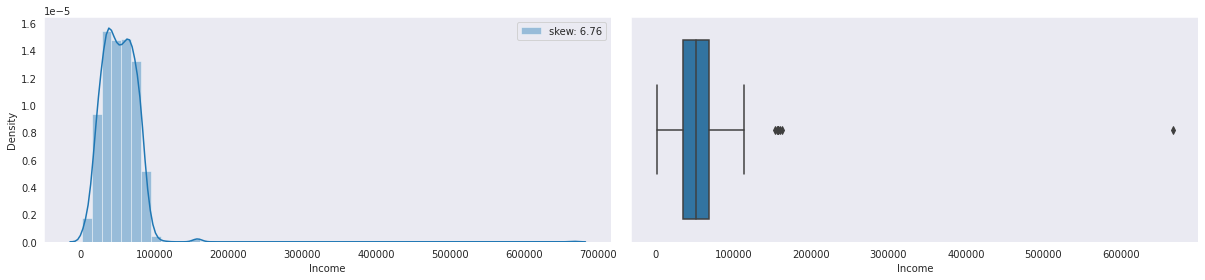

In [4]:
#Noticed Income variable has 24 missing values, I will try to explore the variable to see which method will be used to impuse 
features = ['Income']

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(25,4))
    plt.subplot(131)
    sns.distplot(mktdata_E[col], label="skew: " + str(np.round(mktdata_E[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(mktdata_E[col])

    plt.tight_layout()
    plt.show()

We can see outliners which could make skewness if we impute missing values by mean, instead, we can impute by median

In [5]:
#impute missing values in Income column with the median value
mktdata_E['Income'] = mktdata_E['Income'].fillna(mktdata_E['Income'].median())

In [6]:
mktdata_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
for col in ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
  print("% customer accepted the campaign " + col + " is " + str(mktdata_E[col].sum() / len(mktdata_E[col]) *100) + " %")

% customer accepted the campaign AcceptedCmp1 is 6.428571428571428 %
% customer accepted the campaign AcceptedCmp2 is 1.3392857142857142 %
% customer accepted the campaign AcceptedCmp3 is 7.276785714285714 %
% customer accepted the campaign AcceptedCmp4 is 7.455357142857142 %
% customer accepted the campaign AcceptedCmp5 is 7.276785714285714 %


# **Data Engineering**
Since we don't apply time-series analysis so I will transform timedate variables to 'number of years' form

*   Dt_Customer column stores the date and time a people registered as customer --> Convert to number of years as a customer
*   Year_Birth column stores the birth date of each customer --> convert to ages
*   Engineering the total amount of purchases variable
*   Engineering the total amount of products variable

*   Engineering the "ChildHome": '0' means no children, '1' means having children
*   Engineering the "UsedDeal": '0' means Haven't purchased any deal, '1' means have purchased at least 1 deal








In [8]:
# The column Dt_Customer should be stored as date and time type
mktdata_E['Dt_Customer'] = mktdata_E['Dt_Customer'].astype('datetime64[ns]')
# Calculate the number of year as a customer for each row and store in a new column
from datetime import datetime
mktdata_E['Years_as_Cust'] = pd.DatetimeIndex(mktdata_E['Dt_Customer']).year
mktdata_E['Years_as_Cust'] = 2020 - mktdata_E['Years_as_Cust']
print(mktdata['Years_as_Cust'].describe())

count    2240.000000
mean        6.971875
std         0.684554
min         6.000000
25%         7.000000
50%         7.000000
75%         7.000000
max         8.000000
Name: Years_as_Cust, dtype: float64


In [9]:
# Calculate the ages of customers
mktdata_E['Ages'] = 2020 - mktdata_E['Year_Birth']
print(mktdata_E['Ages'].describe())

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Ages, dtype: float64


In [10]:
# Calculate total amount of product purchased and save them into 'MntTotal'
columns_Mnt = ['MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']
mktdata_E['MntTotal'] = mktdata_E[columns_Mnt].sum(axis=1)

In [11]:
# Calculate total purchases and save them into 'TotalPurchases'
columns_pur = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
mktdata_E['TotalPurchases'] = mktdata_E[columns_pur].sum(axis=1)

In [12]:
# Assign new variable "ChildHome" with '0' means no children and '1' means having children
def f(row):
    if row['Kidhome'] + row['Teenhome'] > 0:
        val = 1
    else:
        val = 0
    return val


mktdata_E['ChildHome'] = mktdata_E.apply(f, axis=1)

In [13]:
# Assign a new variable "UsedDeal": '0' means Haven't purchased any deal, '1' means have purchased at least 1 deal
def d(row):
    if row['NumDealsPurchases'] > 0:
        val = 1
    else:
        val = 0
    return val
mktdata_E['UsedDeal'] = mktdata_E.apply(d, axis=1)

In [14]:
mktdata_E.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,6,50,1001,15,0,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,6,59,113,18,0,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,6,62,117,11,1,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,6,53,1,4,1,1
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,6,31,85,8,1,1


In [15]:
mktdata_E.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.00000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,6.971875,51.194196,301.86250,14.862054,0.715179,0.979464
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,0.684554,11.984069,338.26463,7.677173,0.451430,0.141855
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,24.000000,1.00000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,43.000000,42.00000,8.000000,0.000000,1.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,50.000000,142.50000,15.000000,1.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,61.000000,486.25000,21.000000,1.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,127.000000,1729.00000,44.000000,1.000000,1.000000


In [16]:
mktdata_E.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **Identify the outliners & skewness**

In [17]:
mktdata_E.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'Complain', 'Country', 'Years_as_Cust', 'Ages', 'MntTotal',
       'TotalPurchases', 'ChildHome', 'UsedDeal'], dtype=object)

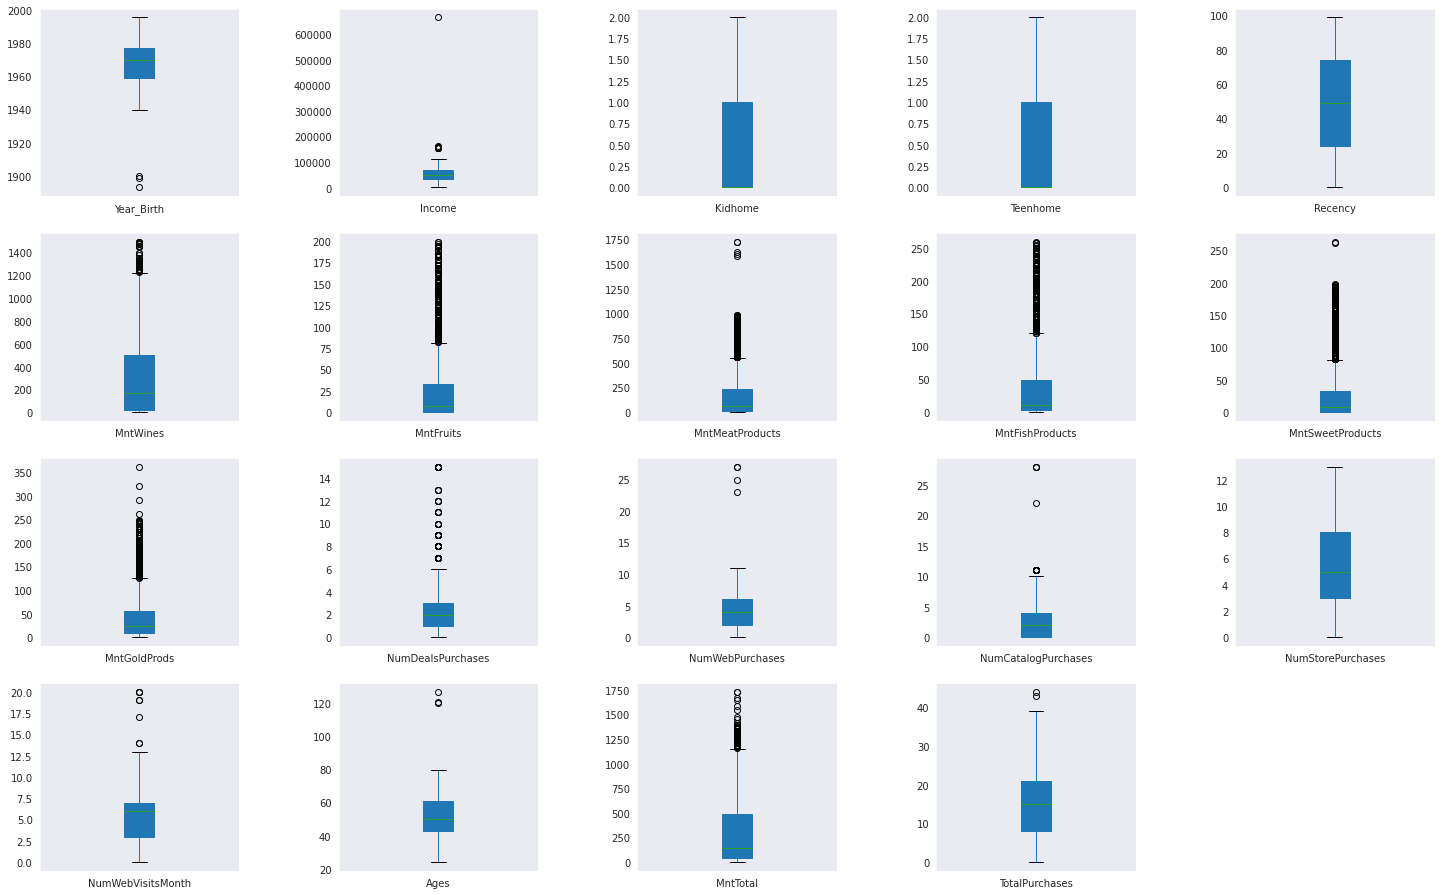

In [18]:
# Select which columns to plot, I eliminate all categorical variables and binary variables
col_to_plot = ['Year_Birth', 'Income',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth',  'Ages', 'MntTotal',
       'TotalPurchases']


# subplots
sns.set_style('dark')
mktdata_E[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [19]:
from scipy.stats import skew

In [20]:
def dist_plot(df, cols):
  sns.set_style('dark')
  plt.figure(figsize=(25,20))
  for i, col in enumerate(cols):
    ax = plt.subplot(5,6, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.text(0.5,0.9,"skew= " + str(round(skew(df[col]),2)), bbox=dict(facecolor='yellow', alpha=0.5), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    plt.xlabel(col)
  plt.show()

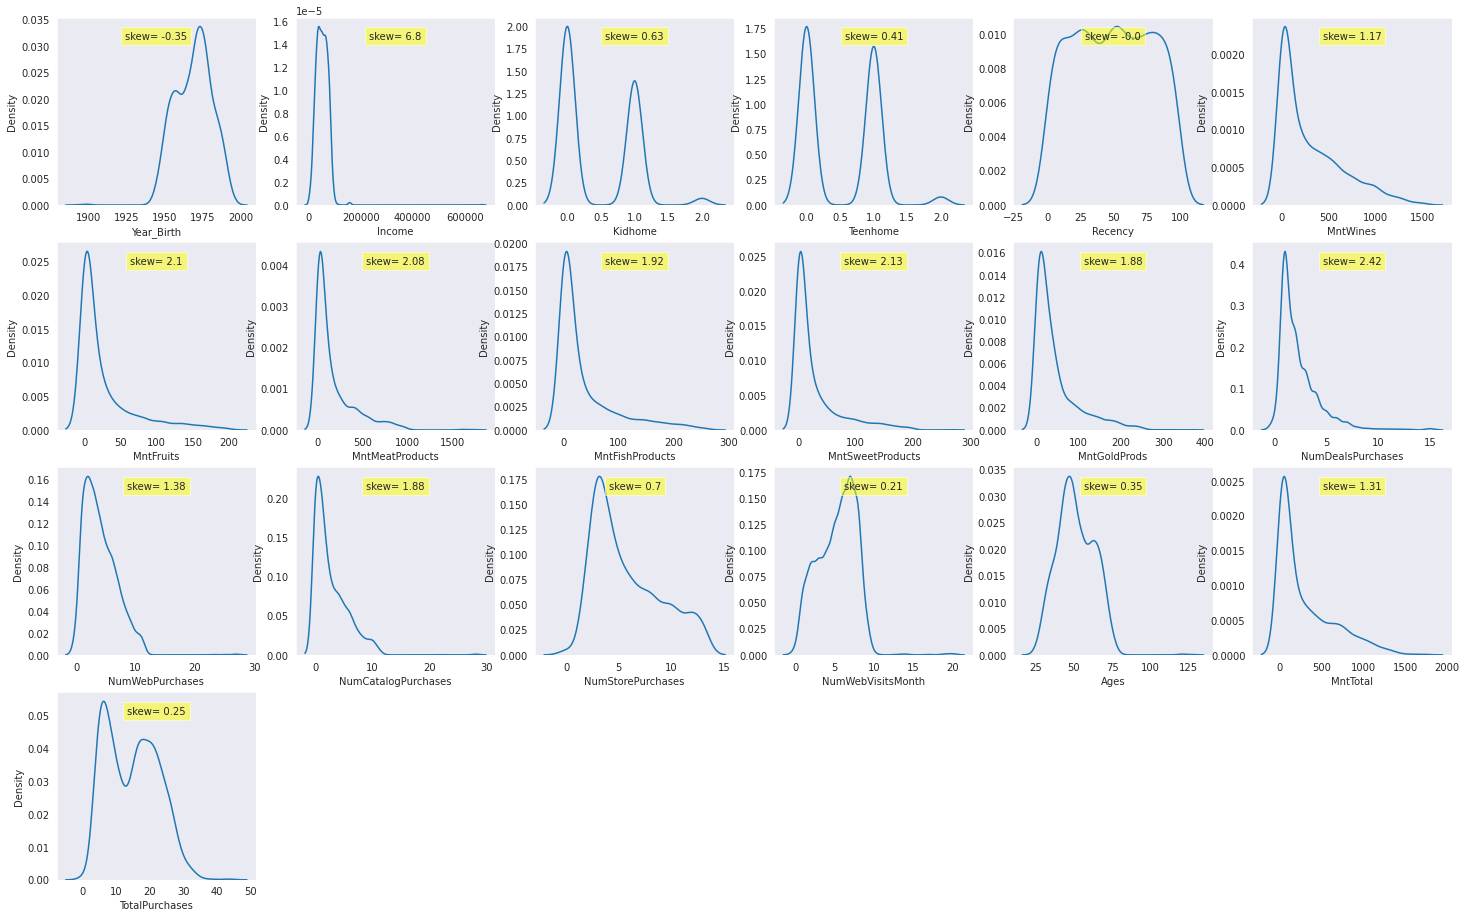

In [21]:
  dist_plot(mktdata_E,col_to_plot)

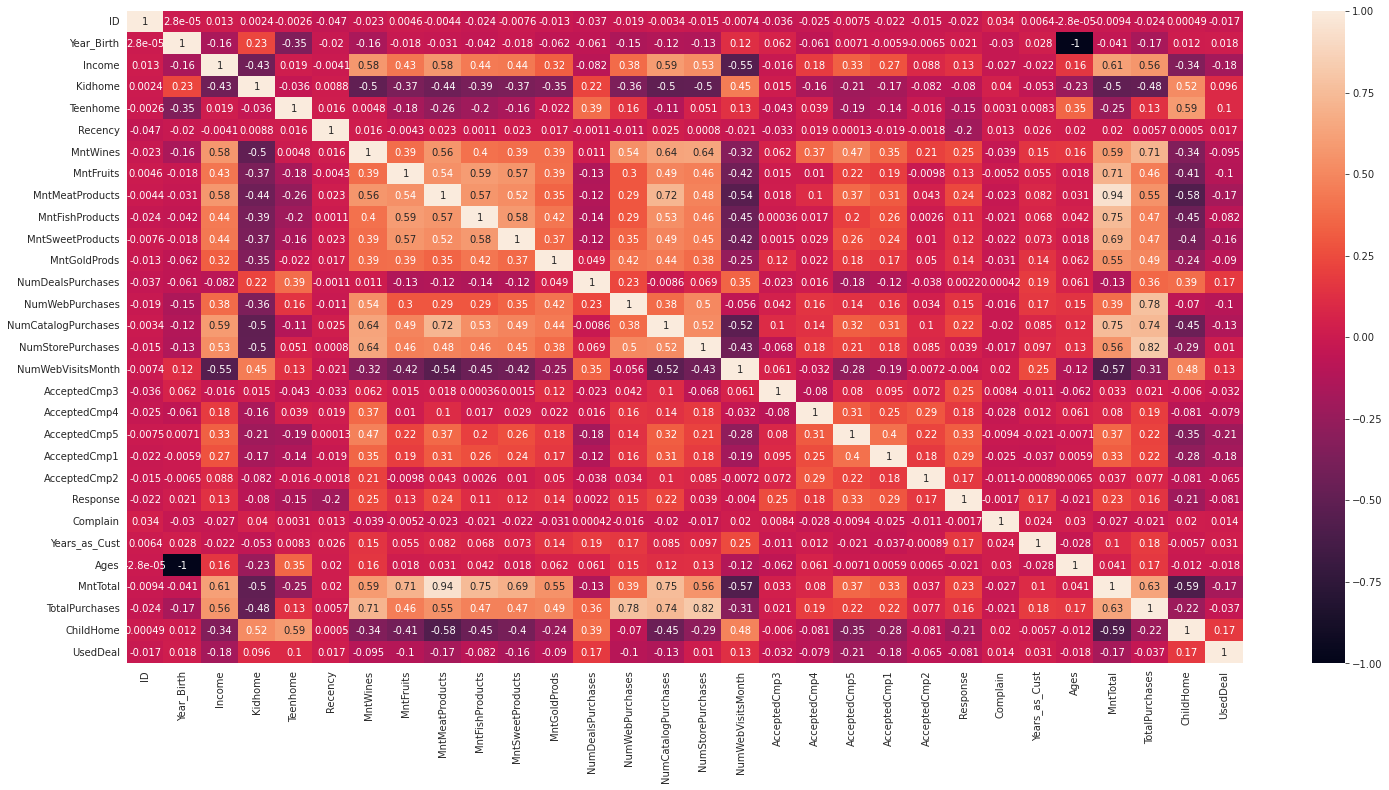

In [22]:
# Look for any correlation
plt.figure(figsize=(25,12))
sns.heatmap(mktdata_E.corr(), annot=True)
plt.show()

In [23]:
# Save the dataset into new DataFrame called mktdata_cap and continue with cap & floor the outliers
mktdata_cap = mktdata_E
features = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Ages', 'MntTotal',
       'TotalPurchases']

In [24]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [25]:
q1 = mktdata_E['Income'].quantile(0.25)
q3 = mktdata_E['Income'].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + (1.5*iqr)
lower_whisker = q1 - (1.5*iqr)
print("Income upper_whisker = " + str(round(upper_whisker,2)))
print("Income lower_whisker = " + str(round(lower_whisker,2)))


Income upper_whisker = 117416.25
Income lower_whisker = -13587.75


In [26]:
q1 = mktdata_E['Ages'].quantile(0.25)
q3 = mktdata_E['Ages'].quantile(0.75)
iqr = q3 - q1
upper_whisker = q3 + (1.5*iqr)
lower_whisker = q1 - (1.5*iqr)
print("Ages upper_whisker = " + str(round(upper_whisker,2)))
print("Ages lower_whisker = " + str(round(lower_whisker,2)))

Ages upper_whisker = 88.0
Ages lower_whisker = 16.0


In [27]:
iqr_capping(mktdata_cap, features, 1.5)


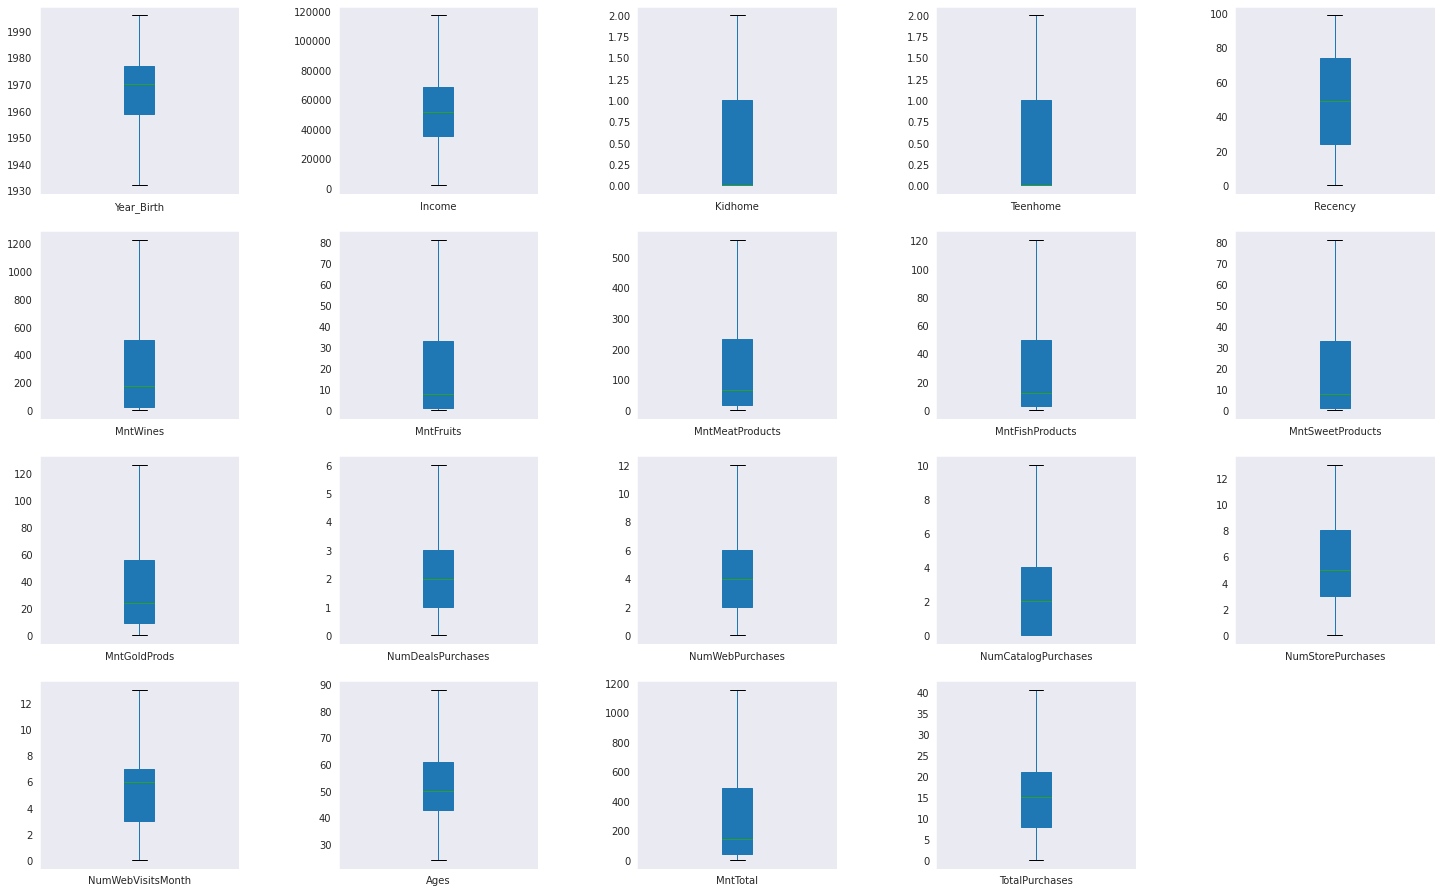

In [28]:
sns.set_style('dark')
mktdata_cap[col_to_plot].plot(subplots=True, layout=(5,5), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

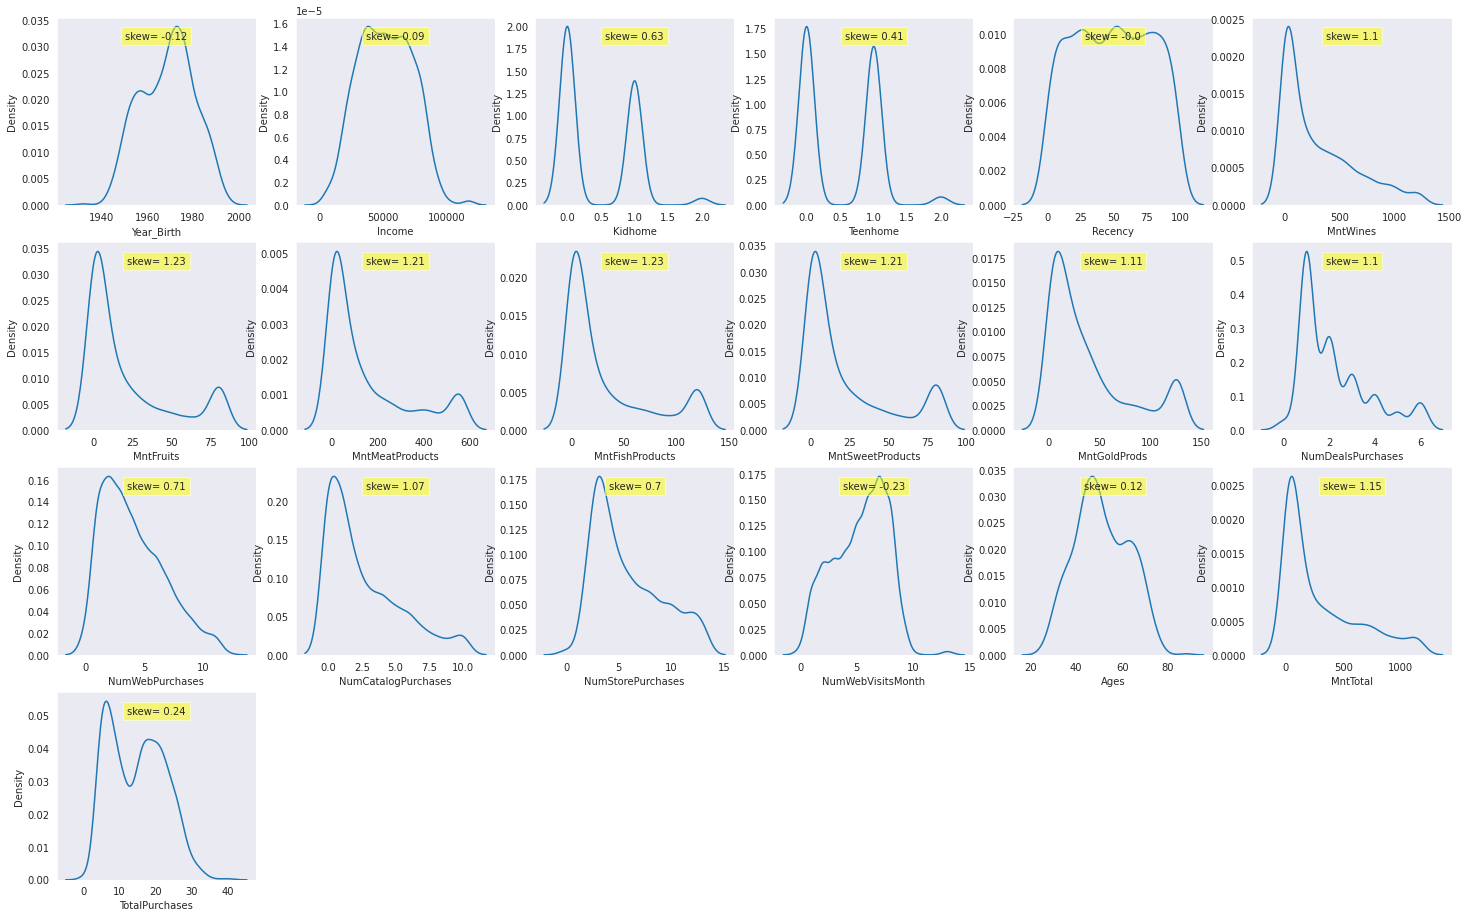

In [29]:
dist_plot(mktdata_cap, col_to_plot)

In [30]:
mktdata_cap

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal
0,1826,1970.0,Graduation,Divorced,84835.0,0,0,2014-06-16,0.0,189.0,81.0,379.0,111.0,81.0,126.5,1.0,4.0,4.0,6.0,1.0,0,0,0,0,0,1,0,SP,6,50.0,1001.0,15.0,0,1
1,1,1961.0,Graduation,Single,57091.0,0,0,2014-06-15,0.0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0,0,0,0,1,1,0,CA,6,59.0,113.0,18.0,0,1
2,10476,1958.0,Graduation,Married,67267.0,0,1,2014-05-13,0.0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0,0,0,0,0,0,0,US,6,62.0,117.0,11.0,1,1
3,1386,1967.0,Graduation,Together,32474.0,1,1,2014-05-11,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0,0,0,0,0,0,0,AUS,6,53.0,1.0,4.0,1,1
4,5371,1989.0,Graduation,Single,21474.0,1,0,2014-04-08,0.0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1,0,0,0,0,1,0,SP,6,31.0,85.0,8.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976.0,PhD,Divorced,66476.0,0,1,2013-03-07,99.0,372.0,18.0,126.0,47.0,48.0,78.0,2.0,5.0,2.0,11.0,4.0,0,0,0,0,0,0,0,US,7,44.0,317.0,20.0,1,1
2236,5263,1977.0,2n Cycle,Married,31056.0,1,0,2013-01-22,99.0,5.0,10.0,13.0,3.0,8.0,16.0,1.0,1.0,0.0,3.0,8.0,0,0,0,0,0,0,0,SP,7,43.0,50.0,5.0,1,1
2237,22,1976.0,Graduation,Divorced,46310.0,1,0,2012-12-03,99.0,185.0,2.0,88.0,15.0,5.0,14.0,2.0,6.0,1.0,5.0,8.0,0,0,0,0,0,0,0,SP,8,44.0,124.0,14.0,1,1
2238,528,1978.0,Graduation,Married,65819.0,0,0,2012-11-29,99.0,267.0,38.0,556.0,120.5,81.0,63.0,1.0,5.0,4.0,10.0,3.0,0,0,0,0,0,0,0,IND,8,42.0,1116.0,20.0,0,1


Code for log transformation

col_to_transform = mktdata.drop(columns=['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'Teenhome',
                                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                       'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain',
                                     'Country'])

for i,col in enumerate(col_to_transform.columns):
  mktdata[col] = np.log(1 + mktdata[col])

# **Apply Standard Scaler to reduce skewness**

In [31]:
#Standardize skewed variables
from sklearn.preprocessing import StandardScaler
columns_scaled = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth',  'Ages', 'MntTotal',
       'TotalPurchases', 'Years_as_Cust']

scalar = StandardScaler()
mktdata_scaled = pd.DataFrame(scalar.fit_transform(mktdata_cap[columns_scaled]), columns=columns_scaled, index=mktdata_cap.index)
mktdata_scaled

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ages,MntTotal,TotalPurchases,Years_as_Cust
0,0.097524,1.575101,-1.696001,-0.341748,2.176816,1.276043,1.954878,2.145044,2.179743,-0.790225,-0.022939,0.503222,0.064556,-1.831096,-0.097524,2.155296,0.018344,-1.420036
1,-0.667191,0.249631,-1.696001,0.489109,-0.612046,-0.485931,-0.622412,-0.796753,-0.062320,-0.790225,1.110530,0.137480,0.372226,-0.127397,0.667191,-0.566680,0.409684,-1.420036
2,-0.922096,0.735789,-1.696001,-0.507919,-0.391872,-0.513899,-0.424159,-0.724116,-0.237677,-0.790225,-0.400762,-0.228262,-0.243114,-1.405171,0.922096,-0.554419,-0.503443,-1.420036
3,-0.157381,-0.926448,-1.696001,-0.882561,-0.795523,-0.838326,-0.795883,-0.796753,-0.989206,-0.790225,-1.156408,-0.959746,-1.166125,0.724452,0.157381,-0.909992,-1.416569,-1.420036
4,1.711921,-1.451973,-1.696001,-0.894646,-0.208395,-0.709674,-0.523285,-0.796753,-0.137473,-0.140168,-0.400762,-0.594004,-1.166125,0.724452,-1.711921,-0.652508,-0.894783,-1.420036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.607334,0.697999,1.722981,0.211150,-0.135004,-0.139130,0.368854,0.946534,0.964770,-0.140168,0.354884,-0.228262,1.602907,-0.553322,-0.607334,0.058639,0.670577,0.041094
2236,0.692302,-0.994193,1.722981,-0.897667,-0.428568,-0.771203,-0.721538,-0.506205,-0.588391,-0.790225,-1.156408,-0.959746,-0.858455,1.150377,-0.692302,-0.759793,-1.286123,0.041094
2237,0.607334,-0.265432,1.722981,-0.353833,-0.722132,-0.351686,-0.424159,-0.615161,-0.638493,-0.140168,0.732707,-0.594004,-0.243114,1.150377,-0.607334,-0.532962,-0.112103,1.502225
2238,0.777270,0.666611,1.722981,-0.106087,0.598907,2.266105,2.190303,2.145044,0.589006,-0.790225,0.354884,0.503222,1.295237,-0.979246,-0.777270,2.507804,0.670577,1.502225


In [32]:
#Adding scaled columns back to dataset
mktdata_scaled = pd.concat([mktdata_scaled, mktdata_cap.drop(axis=1, columns=columns_scaled)],axis=1)

# **Data Transformation**
Before applying any model we need to transform categorical variables into numerical variables using pandas

In [33]:
# Encoding categorical variables using pandas
cat_columns = mktdata_scaled.select_dtypes(exclude = np.number)
print("Number of unique values per categorical feature:\n", cat_columns.nunique())
dummies_cat = pd.get_dummies(cat_columns)

Number of unique values per categorical feature:
 Education           5
Marital_Status      8
Dt_Customer       663
Country             8
dtype: int64


In [34]:
# Add to mktdat_scaled Dataframe and changed the name as mktdata_trf
mktdata_trf = pd.concat([mktdata_scaled,dummies_cat], axis=1)
mktdata_trf = mktdata_trf.drop(columns=cat_columns.columns)
mktdata_trf = mktdata_trf.drop(['ID'], axis=1)
mktdata_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   float64
 1   Income                   2240 non-null   float64
 2   Recency                  2240 non-null   float64
 3   MntWines                 2240 non-null   float64
 4   MntFruits                2240 non-null   float64
 5   MntMeatProducts          2240 non-null   float64
 6   MntFishProducts          2240 non-null   float64
 7   MntSweetProducts         2240 non-null   float64
 8   MntGoldProds             2240 non-null   float64
 9   NumDealsPurchases        2240 non-null   float64
 10  NumWebPurchases          2240 non-null   float64
 11  NumCatalogPurchases      2240 non-null   float64
 12  NumStorePurchases        2240 non-null   float64
 13  NumWebVisitsMonth        2240 non-null   float64
 14  Ages                    

In [35]:
mktdata_trf

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ages,MntTotal,TotalPurchases,Years_as_Cust,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,ChildHome,UsedDeal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0.097524,1.575101,-1.696001,-0.341748,2.176816,1.276043,1.954878,2.145044,2.179743,-0.790225,-0.022939,0.503222,0.064556,-1.831096,-0.097524,2.155296,0.018344,-1.420036,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.667191,0.249631,-1.696001,0.489109,-0.612046,-0.485931,-0.622412,-0.796753,-0.062320,-0.790225,1.110530,0.137480,0.372226,-0.127397,0.667191,-0.566680,0.409684,-1.420036,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,-0.922096,0.735789,-1.696001,-0.507919,-0.391872,-0.513899,-0.424159,-0.724116,-0.237677,-0.790225,-0.400762,-0.228262,-0.243114,-1.405171,0.922096,-0.554419,-0.503443,-1.420036,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.157381,-0.926448,-1.696001,-0.882561,-0.795523,-0.838326,-0.795883,-0.796753,-0.989206,-0.790225,-1.156408,-0.959746,-1.166125,0.724452,0.157381,-0.909992,-1.416569,-1.420036,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1.711921,-1.451973,-1.696001,-0.894646,-0.208395,-0.709674,-0.523285,-0.796753,-0.137473,-0.140168,-0.400762,-0.594004,-1.166125,0.724452,-1.711921,-0.652508,-0.894783,-1.420036,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.607334,0.697999,1.722981,0.211150,-0.135004,-0.139130,0.368854,0.946534,0.964770,-0.140168,0.354884,-0.228262,1.602907,-0.553322,-0.607334,0.058639,0.670577,0.041094,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2236,0.692302,-0.994193,1.722981,-0.897667,-0.428568,-0.771203,-0.721538,-0.506205,-0.588391,-0.790225,-1.156408,-0.959746,-0.858455,1.150377,-0.692302,-0.759793,-1.286123,0.041094,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2237,0.607334,-0.265432,1.722981,-0.353833,-0.722132,-0.351686,-0.424159,-0.615161,-0.638493,-0.140168,0.732707,-0.594004,-0.243114,1.150377,-0.607334,-0.532962,-0.112103,1.502225,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2238,0.777270,0.666611,1.722981,-0.106087,0.598907,2.266105,2.190303,2.145044,0.589006,-0.790225,0.354884,0.503222,1.295237,-0.979246,-0.777270,2.507804,0.670577,1.502225,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


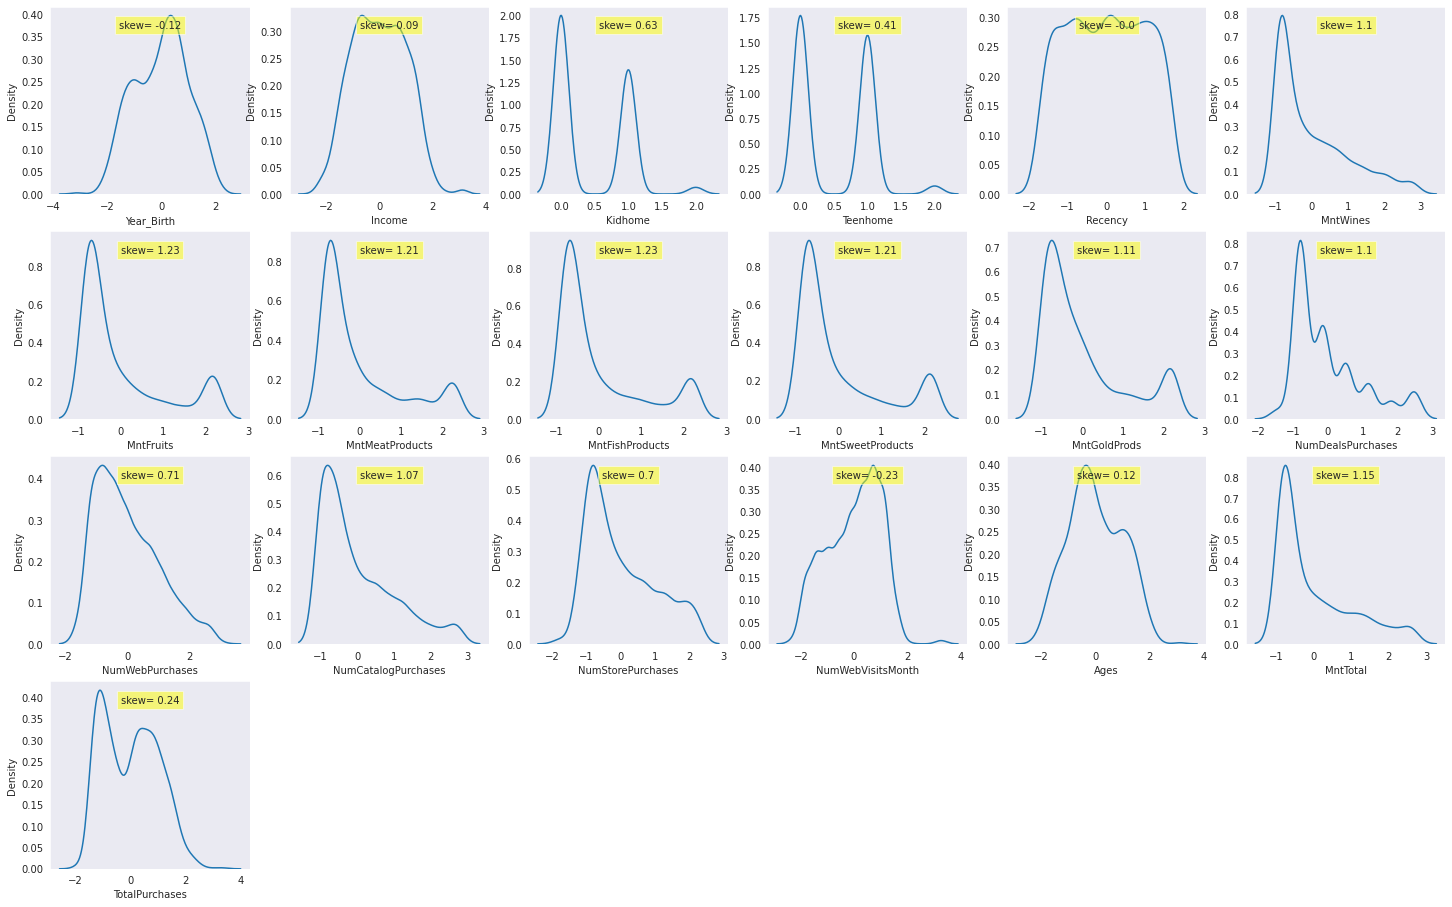

In [36]:
dist_plot(mktdata_trf,col_to_plot)

# **2. Clustering Analysis**

In [37]:
#Apply PCA 
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(mktdata_trf)

In [38]:
pca.n_components_

23

In [39]:
pcaSummary = pd.DataFrame({'std_deviation': np.sqrt(pca.explained_variance_),
              'prop_of_variance' : pca.explained_variance_ratio_,
              'cum_prop_var': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_tps = pcaSummary.transpose()
pcaSummary_tps.columns = ['PC{}'.format(i) for i in range(1,len(pcaSummary_tps.columns) + 1)]
pcaSummary_tps

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
std_deviation,2.859349,1.525958,1.385428,1.018114,0.991215,0.893364,0.766832,0.726915,0.696565,0.587322,0.580288,0.574658,0.559538,0.554657,0.540955,0.532935,0.523658,0.481791,0.442803,0.424085,0.419324,0.367397,0.360121
prop_of_variance,0.383261,0.109156,0.089976,0.048591,0.046057,0.037413,0.027565,0.024770,0.022745,0.016170,0.015785,0.015480,0.014676,0.014421,0.013718,0.013314,0.012855,0.010881,0.009191,0.008431,0.008243,0.006327,0.006079
cum_prop_var,0.383261,0.492417,0.582393,0.630984,0.677041,0.714453,0.742019,0.766789,0.789534,0.805704,0.821489,0.836969,0.851646,0.866067,0.879785,0.893099,0.905953,0.916835,0.926026,0.934457,0.942699,0.949027,0.955106


In [40]:
pcacomponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_tps.columns,
                                index=mktdata_trf.columns)

In [41]:
pcacomponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Year_Birth,-0.061811,-0.455093,-0.478027,-0.133339,0.154614,-0.045321,0.009517,0.043721,-0.029815,0.007491,0.054794,-0.008771,0.037321,0.010094,0.040686,-0.020906,-0.028427,-0.010707,0.020037,-0.003883,-0.061792,0.014258,-0.012724
Income,0.298503,0.006429,0.116710,-0.155820,0.141694,-0.168157,0.003875,0.097818,-0.014562,-0.097620,0.452207,-0.036355,-0.036981,-0.009697,0.116597,-0.328203,-0.006254,0.088510,0.150356,0.125825,0.291247,0.067038,-0.490266
Recency,0.006987,0.010013,0.015231,0.705754,0.698299,-0.031158,0.010766,-0.057081,0.005010,-0.011139,-0.021302,0.000564,0.020791,-0.023999,0.001738,-0.014153,0.007527,0.018399,-0.007352,0.002607,0.010009,0.003716,-0.038884
MntWines,0.270646,0.125116,-0.068766,-0.117393,0.106161,-0.451621,0.126130,-0.120261,0.097328,-0.124014,-0.113076,0.079683,-0.096135,0.320849,-0.164162,-0.305317,-0.295779,0.011263,-0.342403,-0.086978,-0.119156,-0.060472,0.278884
MntFruits,0.267691,-0.130775,-0.015057,0.120615,-0.125643,0.281360,-0.219925,-0.166912,-0.062637,-0.741666,0.005347,-0.041228,0.140414,0.112549,0.093097,0.204049,-0.265464,-0.003406,-0.058943,0.012866,0.038190,0.004207,-0.005526
MntMeatProducts,0.304165,-0.138560,0.036923,0.052855,-0.049682,-0.123167,-0.036812,0.093711,0.376365,-0.131495,-0.069222,-0.082211,-0.250364,-0.127382,-0.046984,-0.050929,0.400757,-0.101786,0.187806,-0.000736,-0.203112,-0.002767,0.118006
MntFishProducts,0.273441,-0.140353,0.016845,0.129791,-0.156305,0.260972,-0.155048,-0.115552,0.056457,0.372254,-0.314240,-0.053308,0.101329,-0.141166,0.386674,-0.462275,-0.289376,0.134944,-0.033199,-0.030543,-0.014058,-0.002362,-0.010176
MntSweetProducts,0.269878,-0.129697,-0.020028,0.124279,-0.098475,0.242780,-0.302091,-0.213018,-0.064398,0.363883,0.327530,0.202242,0.084091,0.335452,-0.509170,0.030003,0.113539,-0.021831,-0.039273,-0.021669,-0.009371,-0.001728,0.020670
MntGoldProds,0.222371,0.054552,-0.153099,0.133686,-0.116355,0.334316,0.786678,0.173644,-0.227588,-0.040522,-0.041127,0.040103,0.086840,0.101220,-0.115692,-0.108493,0.076450,-0.014473,0.043820,-0.047415,0.065736,-0.015479,0.008922
NumDealsPurchases,-0.029955,0.417398,-0.365614,-0.069758,0.120217,0.352124,-0.231033,0.424751,0.336664,-0.047672,-0.044621,0.025981,0.007327,0.086518,-0.021607,-0.074714,0.062853,0.030532,-0.284936,-0.124625,-0.042627,0.030294,-0.150854


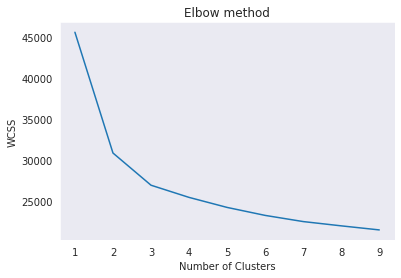

In [42]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

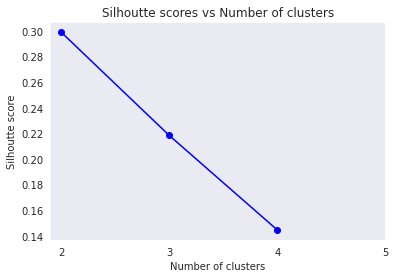

In [43]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.21837614669804783


In [45]:
#adding cluster labels column into dataset
mktdata_E['cluster_id'] = kmeans.labels_
mktdata_trf['cluster_id'] = kmeans.labels_

In [46]:
mktdata_trf = pd.get_dummies(mktdata_trf, columns=['cluster_id'])
mktdata_trf

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ages,MntTotal,TotalPurchases,Years_as_Cust,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,ChildHome,UsedDeal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,cluster_id_0,cluster_id_1,cluster_id_2
0,0.097524,1.575101,-1.696001,-0.341748,2.176816,1.276043,1.954878,2.145044,2.179743,-0.790225,-0.022939,0.503222,0.064556,-1.831096,-0.097524,2.155296,0.018344,-1.420036,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,-0.667191,0.249631,-1.696001,0.489109,-0.612046,-0.485931,-0.622412,-0.796753,-0.062320,-0.790225,1.110530,0.137480,0.372226,-0.127397,0.667191,-0.566680,0.409684,-1.420036,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.922096,0.735789,-1.696001,-0.507919,-0.391872,-0.513899,-0.424159,-0.724116,-0.237677,-0.790225,-0.400762,-0.228262,-0.243114,-1.405171,0.922096,-0.554419,-0.503443,-1.420036,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,-0.157381,-0.926448,-1.696001,-0.882561,-0.795523,-0.838326,-0.795883,-0.796753,-0.989206,-0.790225,-1.156408,-0.959746,-1.166125,0.724452,0.157381,-0.909992,-1.416569,-1.420036,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1.711921,-1.451973,-1.696001,-0.894646,-0.208395,-0.709674,-0.523285,-0.796753,-0.137473,-0.140168,-0.400762,-0.594004,-1.166125,0.724452,-1.711921,-0.652508,-0.894783,-1.420036,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.607334,0.697999,1.722981,0.211150,-0.135004,-0.139130,0.368854,0.946534,0.964770,-0.140168,0.354884,-0.228262,1.602907,-0.553322,-0.607334,0.058639,0.670577,0.041094,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2236,0.692302,-0.994193,1.722981,-0.897667,-0.428568,-0.771203,-0.721538,-0.506205,-0.588391,-0.790225,-1.156408,-0.959746,-0.858455,1.150377,-0.692302,-0.759793,-1.286123,0.041094,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2237,0.607334,-0.265432,1.722981,-0.353833,-0.722132,-0.351686,-0.424159,-0.615161,-0.638493,-0.140168,0.732707,-0.594004,-0.243114,1.150377,-0.607334,-0.532962,-0.112103,1.502225,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2238,0.777270,0.666611,1.722981,-0.106087,0.598907,2.266105,2.190303,2.145044,0.589006,-0.790225,0.354884,0.503222,1.295237,-0.979246,-0.777270,2.507804,0.670577,1.502225,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [47]:
mktdata_E.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal,cluster_id
0,1826,1970.0,Graduation,Divorced,84835.0,0,0,2014-06-16,0.0,189.0,81.0,379.0,111.0,81.0,126.5,1.0,4.0,4.0,6.0,1.0,0,0,0,0,0,1,0,SP,6,50.0,1001.0,15.0,0,1,1
1,1,1961.0,Graduation,Single,57091.0,0,0,2014-06-15,0.0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0,0,0,0,1,1,0,CA,6,59.0,113.0,18.0,0,1,0
2,10476,1958.0,Graduation,Married,67267.0,0,1,2014-05-13,0.0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0,0,0,0,0,0,0,US,6,62.0,117.0,11.0,1,1,2
3,1386,1967.0,Graduation,Together,32474.0,1,1,2014-05-11,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0,0,0,0,0,0,0,AUS,6,53.0,1.0,4.0,1,1,2
4,5371,1989.0,Graduation,Single,21474.0,1,0,2014-04-08,0.0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1,0,0,0,0,1,0,SP,6,31.0,85.0,8.0,1,1,2


In [48]:
mktdata_E.groupby('cluster_id').mean()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal
cluster_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5424.781411,1964.721170,55642.364888,0.313253,0.889845,47.858864,438.209983,16.364888,117.397590,23.291738,16.215146,51.319277,3.640275,6.172117,2.817556,7.259897,6.018933,0.074010,0.139415,0.027539,0.036145,0.020654,0.134251,0.006885,7.177281,55.278830,234.038941,20.317556,0.919105,0.993115
1,5683.944870,1968.166922,74673.639740,0.052067,0.261868,49.967841,587.800919,52.655436,379.643185,79.272588,53.424196,67.962481,1.442573,5.358346,5.696784,8.534456,3.044410,0.076570,0.110260,0.225115,0.186830,0.024502,0.258806,0.007657,6.990812,51.833078,732.423813,21.186064,0.290965,0.950995
2,5629.248509,1971.682903,34880.177187,0.774354,0.443340,49.274354,38.070577,4.641153,21.710736,6.602386,4.805169,14.171471,1.894632,1.999006,0.517893,3.160040,6.346918,0.069583,0.013917,0.000000,0.000994,0.001988,0.086481,0.011928,6.840954,48.317097,52.663643,7.600398,0.872763,0.990060


In [49]:
mktdata_trf

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Ages,MntTotal,TotalPurchases,Years_as_Cust,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,ChildHome,UsedDeal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,cluster_id_0,cluster_id_1,cluster_id_2
0,0.097524,1.575101,-1.696001,-0.341748,2.176816,1.276043,1.954878,2.145044,2.179743,-0.790225,-0.022939,0.503222,0.064556,-1.831096,-0.097524,2.155296,0.018344,-1.420036,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,-0.667191,0.249631,-1.696001,0.489109,-0.612046,-0.485931,-0.622412,-0.796753,-0.062320,-0.790225,1.110530,0.137480,0.372226,-0.127397,0.667191,-0.566680,0.409684,-1.420036,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.922096,0.735789,-1.696001,-0.507919,-0.391872,-0.513899,-0.424159,-0.724116,-0.237677,-0.790225,-0.400762,-0.228262,-0.243114,-1.405171,0.922096,-0.554419,-0.503443,-1.420036,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,-0.157381,-0.926448,-1.696001,-0.882561,-0.795523,-0.838326,-0.795883,-0.796753,-0.989206,-0.790225,-1.156408,-0.959746,-1.166125,0.724452,0.157381,-0.909992,-1.416569,-1.420036,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1.711921,-1.451973,-1.696001,-0.894646,-0.208395,-0.709674,-0.523285,-0.796753,-0.137473,-0.140168,-0.400762,-0.594004,-1.166125,0.724452,-1.711921,-0.652508,-0.894783,-1.420036,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.607334,0.697999,1.722981,0.211150,-0.135004,-0.139130,0.368854,0.946534,0.964770,-0.140168,0.354884,-0.228262,1.602907,-0.553322,-0.607334,0.058639,0.670577,0.041094,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2236,0.692302,-0.994193,1.722981,-0.897667,-0.428568,-0.771203,-0.721538,-0.506205,-0.588391,-0.790225,-1.156408,-0.959746,-0.858455,1.150377,-0.692302,-0.759793,-1.286123,0.041094,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2237,0.607334,-0.265432,1.722981,-0.353833,-0.722132,-0.351686,-0.424159,-0.615161,-0.638493,-0.140168,0.732707,-0.594004,-0.243114,1.150377,-0.607334,-0.532962,-0.112103,1.502225,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2238,0.777270,0.666611,1.722981,-0.106087,0.598907,2.266105,2.190303,2.145044,0.589006,-0.790225,0.354884,0.503222,1.295237,-0.979246,-0.777270,2.507804,0.670577,1.502225,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


# **Based on the demographic of each group, I try to label them as their characteristics**

1.   Cluster_id = 0: Low income & less spending = L&L
2.   Cluster_id = 1: High income & Loyal = H&H
1.   Cluster_id = 2: Medium income & medium speding = M&M 

In [50]:
#change label name of cluster_id
mktdata_E = mktdata.assign(cluster_cat=pd.cut(mktdata['cluster_id'], 
                               bins=[-1, 0.5, 1.5, 2.5], 
                               labels=['M&M', 'H&H', 'L&L']))
mktdata_E.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Years_as_Cust,Ages,MntTotal,TotalPurchases,ChildHome,UsedDeal,cluster_id,cluster_cat
0,1826,1970.0,Graduation,Divorced,84835.0,0,0,2014-06-16,0.0,189.0,81.0,379.0,111.0,81.0,126.5,1.0,4.0,4.0,6.0,1.0,0,0,0,0,0,1,0,SP,6,50.0,1001.0,15.0,0,1,1,H&H
1,1,1961.0,Graduation,Single,57091.0,0,0,2014-06-15,0.0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0,0,0,0,1,1,0,CA,6,59.0,113.0,18.0,0,1,0,M&M
2,10476,1958.0,Graduation,Married,67267.0,0,1,2014-05-13,0.0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0,0,0,0,0,0,0,US,6,62.0,117.0,11.0,1,1,2,L&L
3,1386,1967.0,Graduation,Together,32474.0,1,1,2014-05-11,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0,0,0,0,0,0,0,AUS,6,53.0,1.0,4.0,1,1,2,L&L
4,5371,1989.0,Graduation,Single,21474.0,1,0,2014-04-08,0.0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1,0,0,0,0,1,0,SP,6,31.0,85.0,8.0,1,1,2,L&L


In [51]:
# Partition and transform data before modeling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
r_state = 3


# isolate X and y variables, and perform train-test split
X = mktdata_trf.drop(['Response'], axis=1)
y = mktdata_trf['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


# **3. Applying Modeling to predict Campaign Response**

# **Logistic regression**

In [52]:
# Logistic regression model
lored = LogisticRegression(C=1e9)
lored.fit(X_train, y_train)

# predictions
y_pred_lored = lored.predict(X_test)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lored)))
print("Median value of target variable: ", y.median())

Logistic regression model RMSE:  0.3535533905932738
Median value of target variable:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [53]:
# import the metrics class
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred_lored)
cm

array([[447,  14],
       [ 56,  43]])

Text(0.5, 257.44, 'Predicted label')

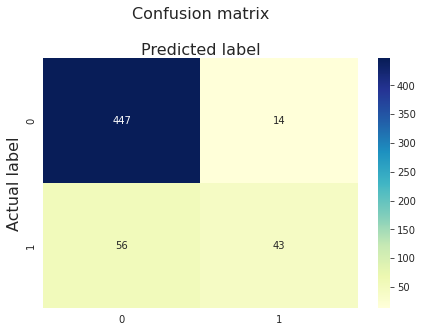

In [54]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [55]:
# Print accuracy, Precision, Recall and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lored))
print("Precision:",metrics.precision_score(y_test, y_pred_lored, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_lored, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_lored, average="binary"))

Accuracy: 0.875
Precision: 0.7543859649122807
Recall: 0.43434343434343436
F1 Score: 0.5512820512820513


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

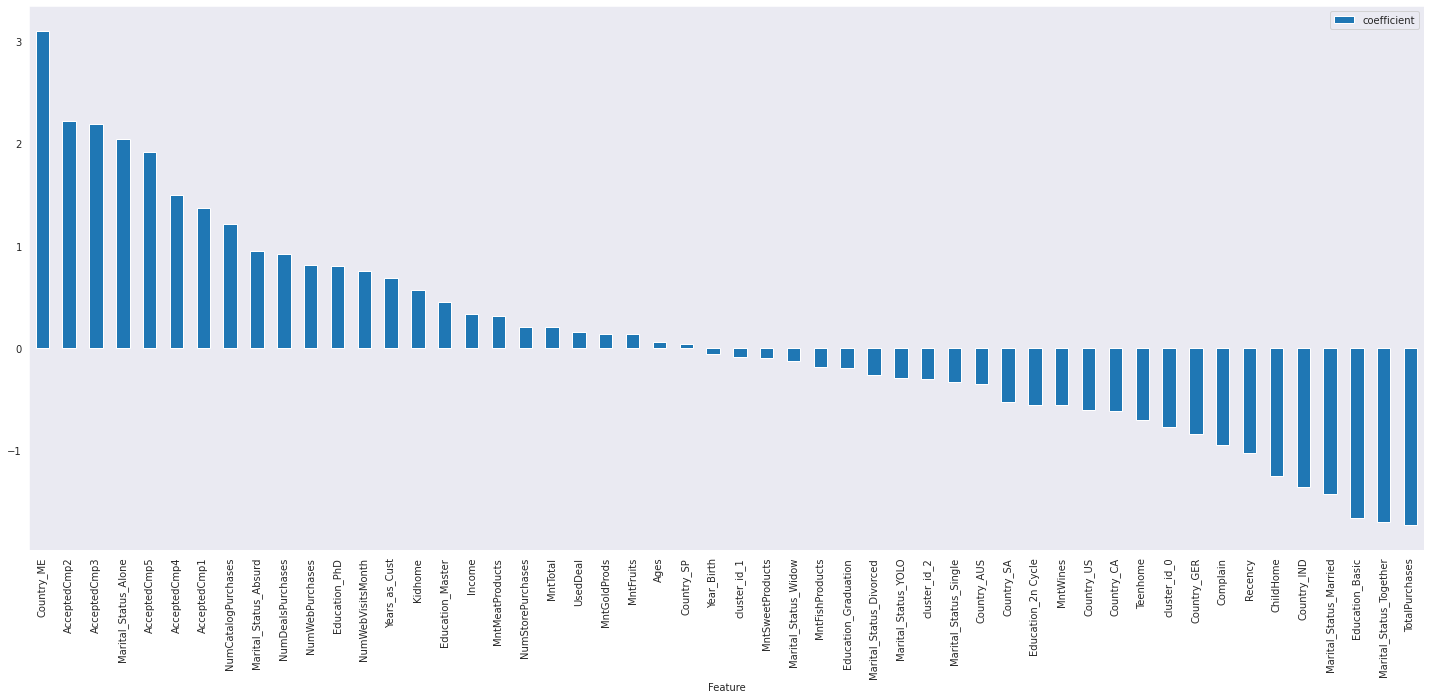

In [56]:
#Create DataFrame of coefficient
coefficient = pd.DataFrame({'Feature': X_train.columns, 'coefficient' : lored.coef_[0]})
coefficient = coefficient.sort_values(by=['coefficient'],ascending=False)

# plot the coefficient 
ax = coefficient.plot.bar(x='Feature', y='coefficient', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

# **Decision Tree**

## Maximal Tree


In [57]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_maxtree = clf.predict(X_test)

# evaluate model using RMSE
print("Decision Tree model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_maxtree)))
print("Median value of target variable: ", y.median())

Decision Tree model RMSE:  0.3964124835860459
Median value of target variable:  0.0


In [58]:
print("Max depth= " + str(clf.get_depth()))
print("Number of Leaves= " + str(clf.get_n_leaves()))

Max depth= 20
Number of Leaves= 155


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

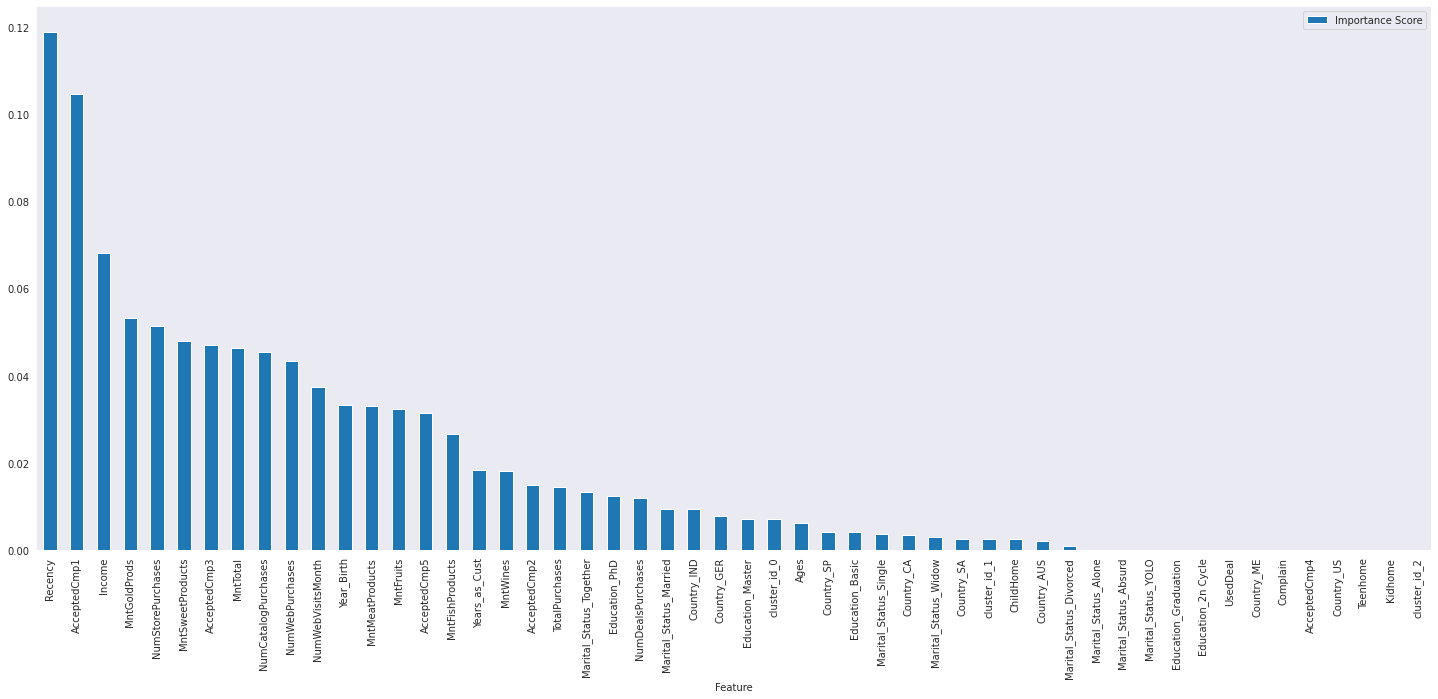

In [59]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance Score' : clf.feature_importances_})
importance = importance.sort_values(by=['Importance Score'],ascending=False)

# plot feature importance
ax = importance.plot.bar(x='Feature', y='Importance Score', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred_maxtree)
cm

array([[430,  31],
       [ 57,  42]])

Text(0.5, 257.44, 'Predicted label')

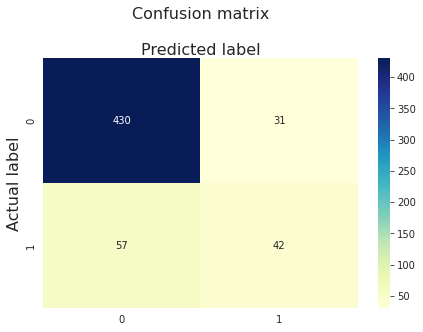

In [61]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_maxtree))
print("Precision:",metrics.precision_score(y_test, y_pred_maxtree, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_maxtree, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_maxtree, average="binary"))

Accuracy: 0.8428571428571429
Precision: 0.5753424657534246
Recall: 0.42424242424242425
F1 Score: 0.48837209302325585


In [63]:
!pip install graphviz

In [64]:
!pip install pydotplus

In [65]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_mktdata.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

## Tuning to get optimal Tree

In [ ]:
# Code for Tunning the Tree
from sklearn.model_selection import GridSearchCV

param_dict = {"criterion": ['gini', 'entropy' ],
              "max_depth": range (1, 20),
              "min_samples_split": range (1, 10),
              "min_samples_leaf": range (1, 5)}

grid = GridSearchCV(clf,
                    param_grid = param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train, y_train)

print(str(grid.best_estimator_))
print(grid.best_score_)

#DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, min_samples_split=6)

In [66]:
# Create Decision Tree classifer object
clf_op = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=6)

# Train Decision Tree Classifer
clf_op = clf_op.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_optree = clf_op.predict(X_test)

# evaluate model using RMSE
print("Optimal Decision Tree model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_optree)))
print("Median value of target variable: ", y.median())

Optimal Decision Tree model RMSE:  0.3755947664324259
Median value of target variable:  0.0


In [67]:
print("Max depth= " + str(clf_op.get_depth()))
print("Number of Leaves= " + str(clf_op.get_n_leaves()))

Max depth= 4
Number of Leaves= 15


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

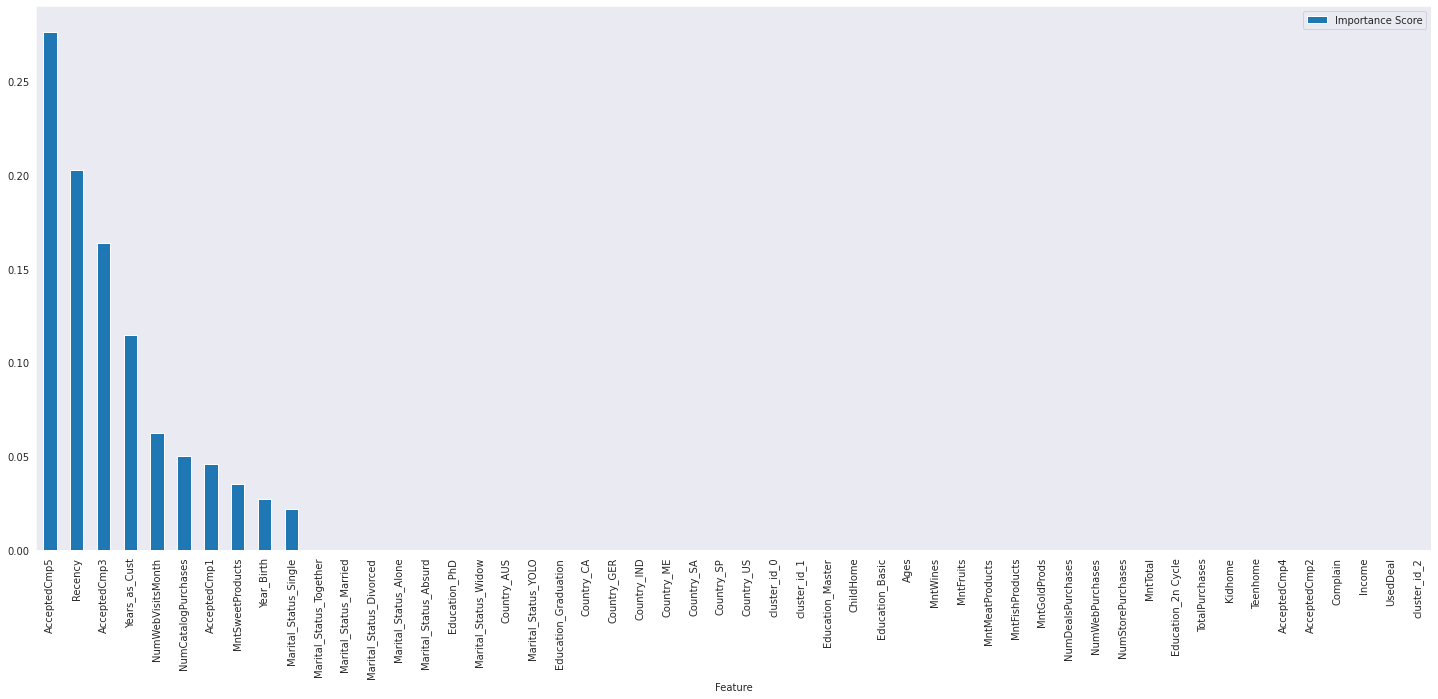

In [68]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance Score' : clf_op.feature_importances_})
importance = importance.sort_values(by=['Importance Score'],ascending=False)

# plot feature importance
ax = importance.plot.bar(x='Feature', y='Importance Score', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

Text(0.5, 257.44, 'Predicted label')

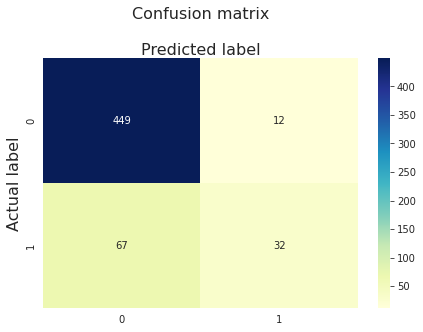

In [69]:
cm = metrics.confusion_matrix(y_test, y_pred_optree)
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_optree))
print("Precision:",metrics.precision_score(y_test, y_pred_optree, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_optree, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_optree, average="binary"))

Accuracy: 0.8589285714285714
Precision: 0.7272727272727273
Recall: 0.32323232323232326
F1 Score: 0.44755244755244755


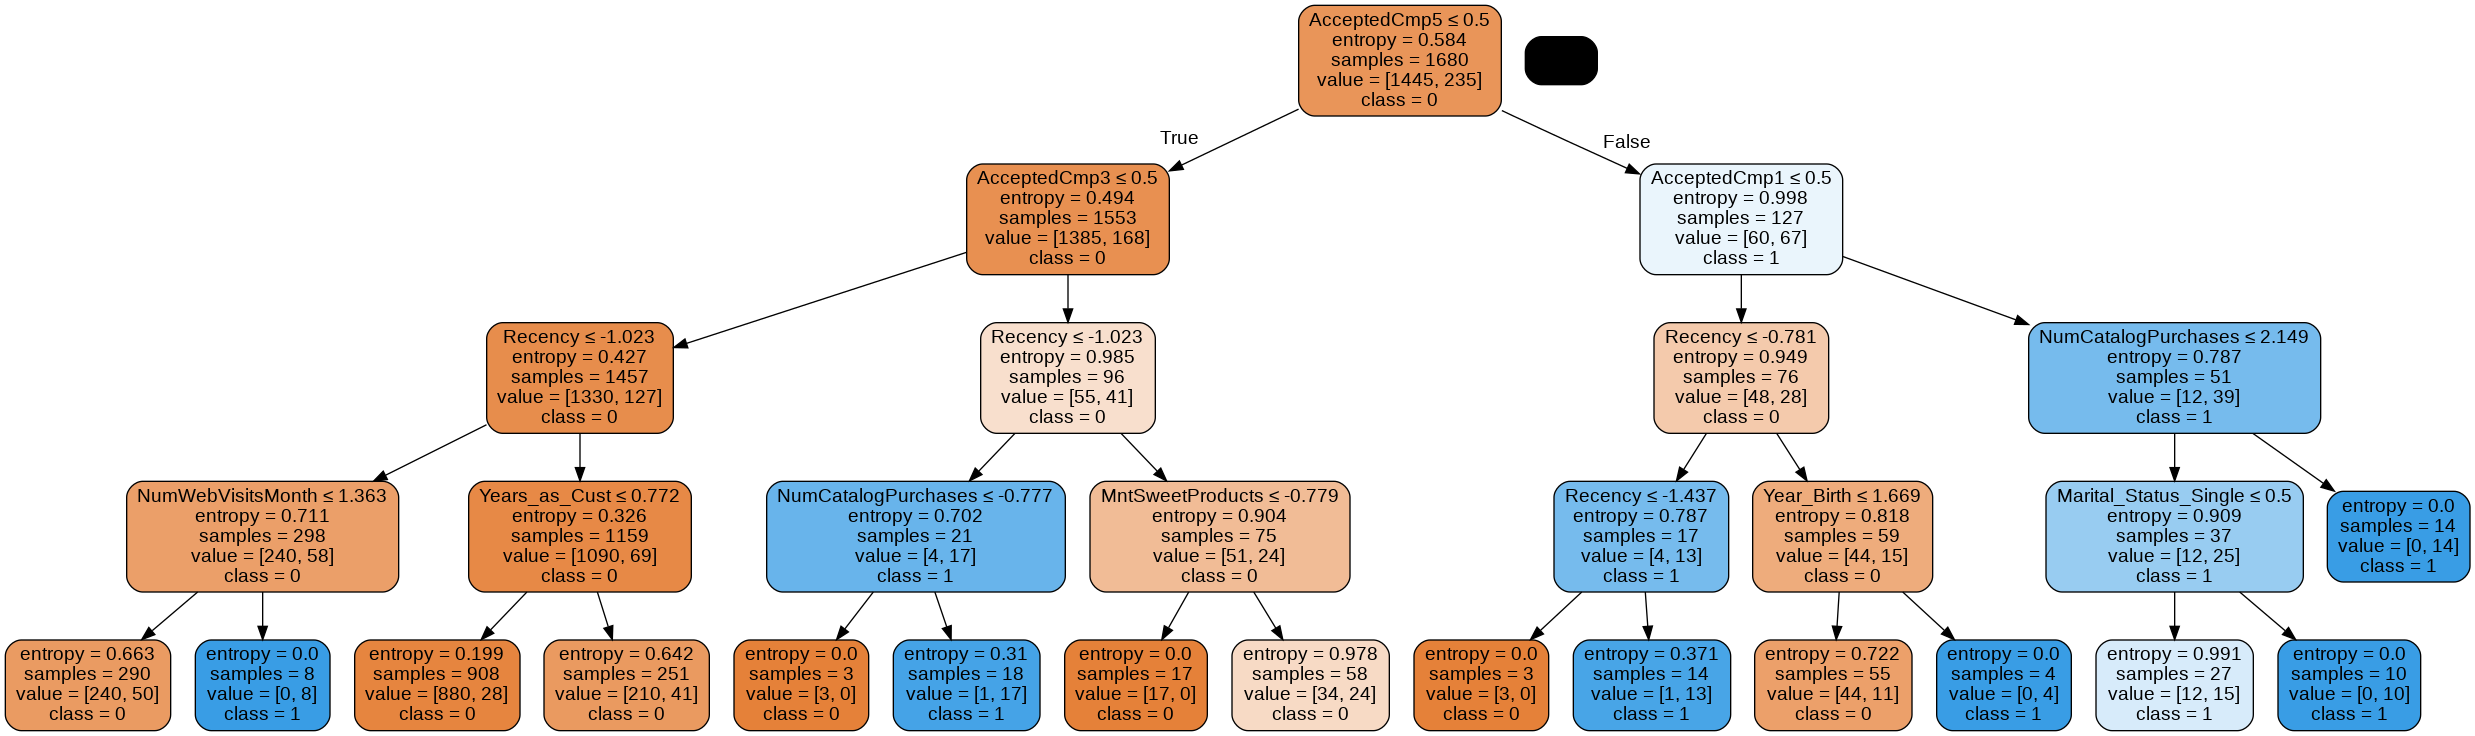

In [71]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_op, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_mktdata_op.png')
Image(graph.create_png())

# **Gradient Boosting Classifier**

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = 3)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)

# evaluate model using RMSE
print("Gradient Booster Classifier model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_GBC)))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_GBC))
print("Precision:",metrics.precision_score(y_test, y_pred_GBC, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_GBC, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_GBC, average="binary"))

Gradient Booster Classifier model RMSE:  0.3635145899999849
Accuracy: 0.8678571428571429
Precision: 0.7906976744186046
Recall: 0.3434343434343434
F1 Score: 0.47887323943661964


# Tunning model

In [ ]:
# Code for Tunning Model
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'learning_rate' : [0.2, 0.3, 0.4, 0.5],
    'n_estimators' : [300, 500, 700, 900],
    'min_samples_split' : [3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5],
    'loss' : ['deviance', 'exponential']
}
random_cv = RandomizedSearchCV(estimator=classifier_GBC,
                              param_distributions=grid,
                              n_iter=20,
                              n_jobs=-1,
                              cv=5,
                              verbose=7,
                              random_state=10,
                              scoring='accuracy')
random_cv.fit(X_train, y_train)

random_cv.best_estimator_


In [73]:
hgb = GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=4,
                           min_samples_split=4, n_estimators=300,
                           random_state=3)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

# evaluate model using RMSE
print("Gradient Booster Classifier model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_hgb)))
print("Median value of target variable: ", y.median())

Gradient Booster Classifier model RMSE:  0.3635145899999849
Median value of target variable:  0.0


In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_hgb))

Accuracy: 0.8678571428571429


In [75]:
cm = metrics.confusion_matrix(y_test, y_pred_hgb)
cm

array([[448,  13],
       [ 61,  38]])

Text(0.5, 257.44, 'Predicted label')

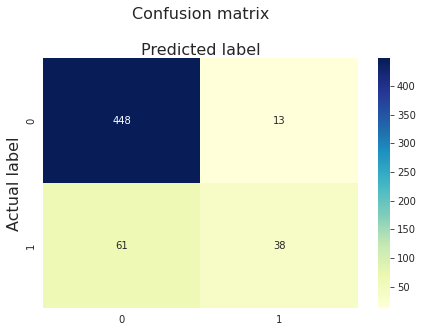

In [76]:
cls_names=[0,1] # name  of classes
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_hgb))
print("Precision:",metrics.precision_score(y_test, y_pred_hgb, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_hgb, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_hgb, average="binary"))

Accuracy: 0.8678571428571429
Precision: 0.7450980392156863
Recall: 0.3838383838383838
F1 Score: 0.5066666666666666


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

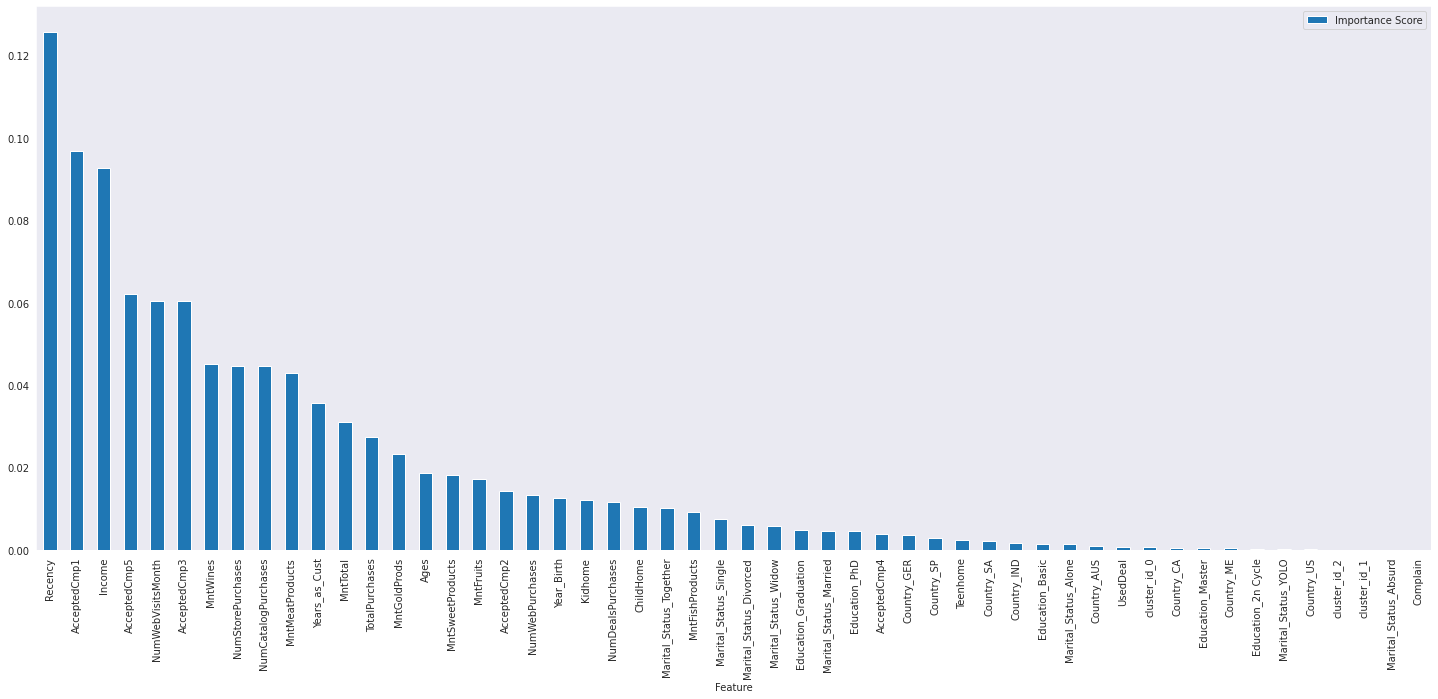

In [78]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance Score' : hgb.feature_importances_})
importance = importance.sort_values(by=['Importance Score'],ascending=False)

# plot feature importance
ax = importance.plot.bar(x='Feature', y='Importance Score', figsize=(25,10),rot=0)
plt.xticks(rotation=90)

# **Neural Network**

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
# set Hyper parameters
learning_rate=0.01
no_epochs=100


In [80]:
# Model creation

model = Sequential([
    Flatten(input_shape=(52,)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [81]:
#Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
# Fit model
model.fit(X_train, y_train, epochs=no_epochs, batch_size=len(mktdata_trf),  verbose=2)


Epoch 1/100
1/1 - 2s - loss: 0.6312 - accuracy: 0.6845 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 0.6192 - accuracy: 0.7125 - 12ms/epoch - 12ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6076 - accuracy: 0.7387 - 10ms/epoch - 10ms/step
Epoch 4/100
1/1 - 0s - loss: 0.5963 - accuracy: 0.7613 - 11ms/epoch - 11ms/step
Epoch 5/100
1/1 - 0s - loss: 0.5854 - accuracy: 0.7774 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 0.5749 - accuracy: 0.7940 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5647 - accuracy: 0.8113 - 10ms/epoch - 10ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5549 - accuracy: 0.8202 - 15ms/epoch - 15ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5454 - accuracy: 0.8286 - 8ms/epoch - 8ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5363 - accuracy: 0.8363 - 8ms/epoch - 8ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5275 - accuracy: 0.8429 - 8ms/epoch - 8ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5191 - accuracy: 0.8458 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5111 - accuracy: 0.84

In [83]:
y_pred_NN = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


18/18 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8250
Test accuracy: 0.824999988079071


## FInding the significant variables to include in the best model so far the logistic Regression model

In [84]:
from sklearn.feature_selection import RFE

In [85]:
rfe = RFE(lored,n_features_to_select=40)
rfe = rfe.fit(X_train, y_train.values)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False  True  True  True False  True False False  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False False  True  True  True  True  True  True False
  True  True False False]
[12  1  1  1  6  1  4  9  1  1  1  1  1  1  7  8  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1 11 10  1  1  1  1  1  1 13
  1  1  5  3]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [86]:
X_train_sig = X_train.loc[:, [False, True, True, True, False, True, False, False, True, True, True, True
                              , True, True, False, False, True, True, True, True, True, True, True, True
                              , True, True, True, True, True, True, True, True, True, True, True, False
                              , True, True, True, False, False, True, True, True, True, True, True, False
                              , True, True, False, False]
                          ]
X_test_sig = X_test.loc[:, [False, True, True, True, False, True, False, False, True, True, True, True
                              , True, True, False, False, True, True, True, True, True, True, True, True
                              , True, True, True, True, True, True, True, True, True, True, True, False
                              , True, True, True, False, False, True, True, True, True, True, True, False
                              , True, True, False, False]
                        ]

In [87]:
X_train_sig

,Income,Recency,MntWines,MntMeatProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalPurchases,Years_as_Cust,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,ChildHome,UsedDeal,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_US,cluster_id_0
104,-0.164054,-1.592395,0.060085,-0.564241,0.062935,1.810001,1.110530,-0.594004,0.064556,1.150377,0.540131,1.502225,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2039,-0.615241,1.412165,-0.417281,-0.267782,0.062935,2.460058,0.354884,-0.594004,0.064556,1.150377,0.540131,1.502225,1,2,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1942,-0.769220,1.274024,-0.846305,-0.676113,-0.613442,-0.140168,-0.778585,-0.959746,-0.550785,0.298528,-0.894783,0.041094,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1241,-0.768026,0.168899,-0.876518,-0.732048,-0.914053,-0.140168,-0.778585,-0.959746,-0.858455,0.724452,-1.025229,0.041094,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1723,-1.349639,0.928672,-0.900688,-0.782390,-0.187575,-0.140168,-0.400762,-0.959746,-0.858455,1.150377,-0.894783,1.502225,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.909022,-0.245523,1.407584,2.266105,-0.638493,-0.790225,0.732707,1.234706,1.295237,-0.979246,1.061918,0.041094,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
905,0.530596,-0.349129,0.032893,-0.581022,2.179743,-0.140168,1.110530,0.503222,-0.858455,0.298528,0.148791,1.502225,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1096,-0.023141,-0.003777,-0.897667,-0.793578,-0.889002,-0.790225,-1.156408,-0.959746,-1.166125,0.724452,-1.416569,-1.420036,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
235,-1.195134,-1.350649,-0.819113,-0.771203,-0.763747,1.159945,-0.778585,-0.594004,-0.550785,-0.553322,-0.503443,-1.420036,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [88]:
# Logistic regression model
lored = LogisticRegression(C=1e9)
lored.fit(X_train_sig, y_train)

# predictions
y_pred = lored.predict(X_test_sig)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Median value of target variable: ", y.median())

Logistic regression model RMSE:  0.35606981658898623
Median value of target variable:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average="binary"))

Accuracy: 0.8732142857142857
Precision: 0.7413793103448276
Recall: 0.43434343434343436
F1 Score: 0.5477707006369427


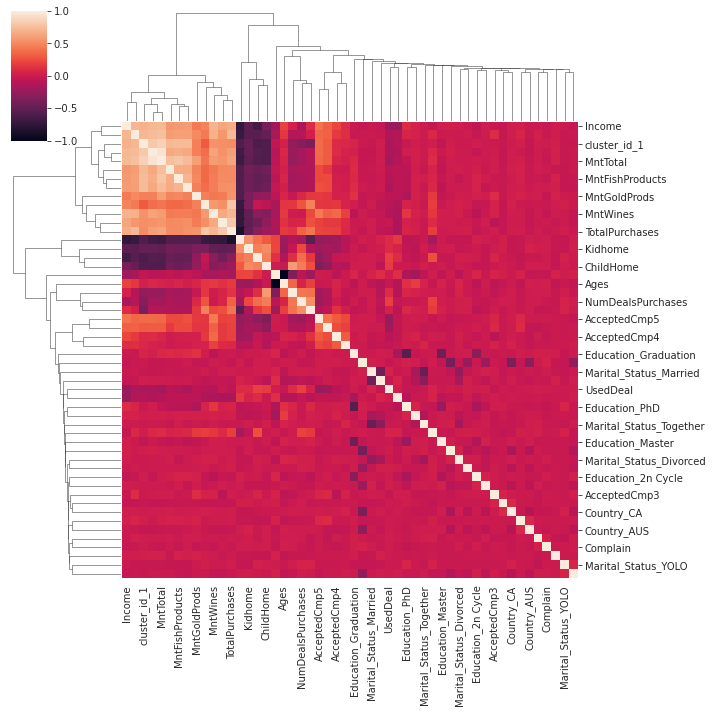

In [90]:
sns.clustermap(X_train.corr())

In [91]:
import statsmodels.api as sm
log_reg = sm.GLM(y_train, X_train).fit()
print(log_reg.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                 1680
Model:                            GLM   Df Residuals:                     1632
Model Family:                Gaussian   Df Model:                           47
Link Function:               identity   Scale:                        0.080937
Method:                          IRLS   Log-Likelihood:                -236.49
Date:                Fri, 17 Dec 2021   Deviance:                       130.35
Time:                        14:55:15   Pearson chi2:                     130.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year_Birth                

# Try logit model

In [92]:
rfe = RFE(lored,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train.values)
print(rfe.support_)
print(rfe.ranking_)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False  True False False  True False False False  True  True  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True False False  True False False  True  True  True False
  True False  True False False False False  True  True  True False False
 False False False False]
[27 11  1  7 21  1 19 24 16  1  1  1 12  2 22 23  1  1  1  1  1  1  1  1
  1  1  1 14 10  1 13  6  1  1  1 17  1 15  1 26 25  9  5  1  1  1  4 28
  3  8 20 18]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [93]:
X_train_sig = X_train.loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False, True, False, False]]

X_test_sig = X_test.loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False, True, False, False]]

In [94]:
log_reg = sm.Logit(y_train, X_train_sig).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.247081
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1680
Model:                          Logit   Df Residuals:                     1655
Method:                           MLE   Df Model:                           24
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.3895
Time:                        14:55:21   Log-Likelihood:                -415.10
converged:                       True   LL-Null:                       -679.98
Covariance Type:            nonrobust   LLR p-value:                 1.084e-96
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Recency                    -0.8999      0.100     -8.998      0.000      -1.096   

In [95]:
y_pred_24logit = log_reg.predict(X_test_sig)


In [96]:
# change the y_pred from probability to decrete value 0 and 1
for idx in y_pred_24logit.index :
  if y_pred_24logit[idx] < 0.5:
    y_pred_24logit[idx] = 0
  else:
    y_pred_24logit[idx] = 1

In [97]:
print("Logistic regression with 24 features model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_24logit)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_24logit))
print("Precision:",metrics.precision_score(y_test, y_pred_24logit, average="binary"))
print("Recall:",metrics.recall_score(y_test, y_pred_24logit, average="binary"))
print("F1 Score:",metrics.f1_score(y_test, y_pred_24logit, average="binary"))

Logistic regression with 24 features model RMSE:  0.34589428608009287
Accuracy: 0.8803571428571428
Precision: 0.7758620689655172
Recall: 0.45454545454545453
F1 Score: 0.5732484076433122


# Analyze with labels of groups

In [98]:
# Create dataframe mktdata_trf_sig to predict target with 24 features
mktdata_trf_sig =mktdata_trf.drop(['Response'], axis=1).loc[:, [False, False, True, False, False, True , False, False, False, True, True, True
                              , False, True, False, False, True, True, True, True, True, True, True, True
                              , True, False, True, False, False, True, False, True, True, False, True , False
                              , True, False, True, False, False, False, False, False, True, False, False, True 
                              , False, True, False, False]]


In [99]:
y_pred_sig = log_reg.predict(mktdata_trf_sig)

# change the y_pred from probability to decrete value 0 and 1
for idx in y_pred_sig.index :
  if y_pred_sig[idx] < 0.5:
    y_pred_sig[idx] = 0
  else:
    y_pred_sig[idx] = 1


mktdata_E['Response_pred'] = y_pred_sig


cluster_cat           M&M         H&H         L&L
Response_pred                                    
0.0            545.000000  508.000000  955.000000
1.0             36.000000  145.000000   51.000000
%Repsonse        6.196213   22.205207    5.069583


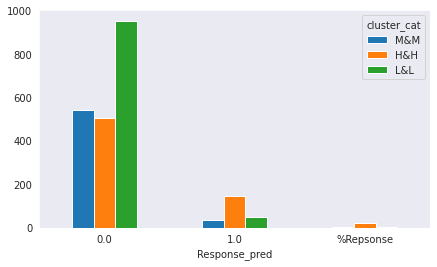

In [100]:
CrosstabResult = pd.crosstab(index=mktdata_E['Response_pred'],columns=mktdata_E['cluster_cat'])
CrosstabResult.loc['%Repsonse'] = (CrosstabResult.loc[1]/ (CrosstabResult.loc[1]+CrosstabResult.loc[0]))*100
print(CrosstabResult)


CrosstabResult.plot.bar(figsize=(7,4), rot=0)

So the H&H group is likely to response to our campaign and the L&L is the least likely to repsonse

In [101]:
# Create data frame for H&H group who likely to response "Yes" to our next campaign
mktdata_H = mktdata_E.loc[mktdata_E['cluster_id'] == 1]
mktdata_H = mktdata_H.loc[mktdata_H['Response_pred'] == 1]

# Create data frame for M&M group who likely to response "No" to our next campaign
mktdata_L = mktdata_E.loc[mktdata['cluster_id'] == 2]
mktdata_L = mktdata_L.loc[mktdata_L['Response_pred'] == 0]

# Create data frame for M&M group who likely to response "No" to our next campaign
mktdata_M = mktdata_E.loc[mktdata['cluster_id'] == 0]
mktdata_M = mktdata_M.loc[mktdata_M['Response_pred'] == 0]


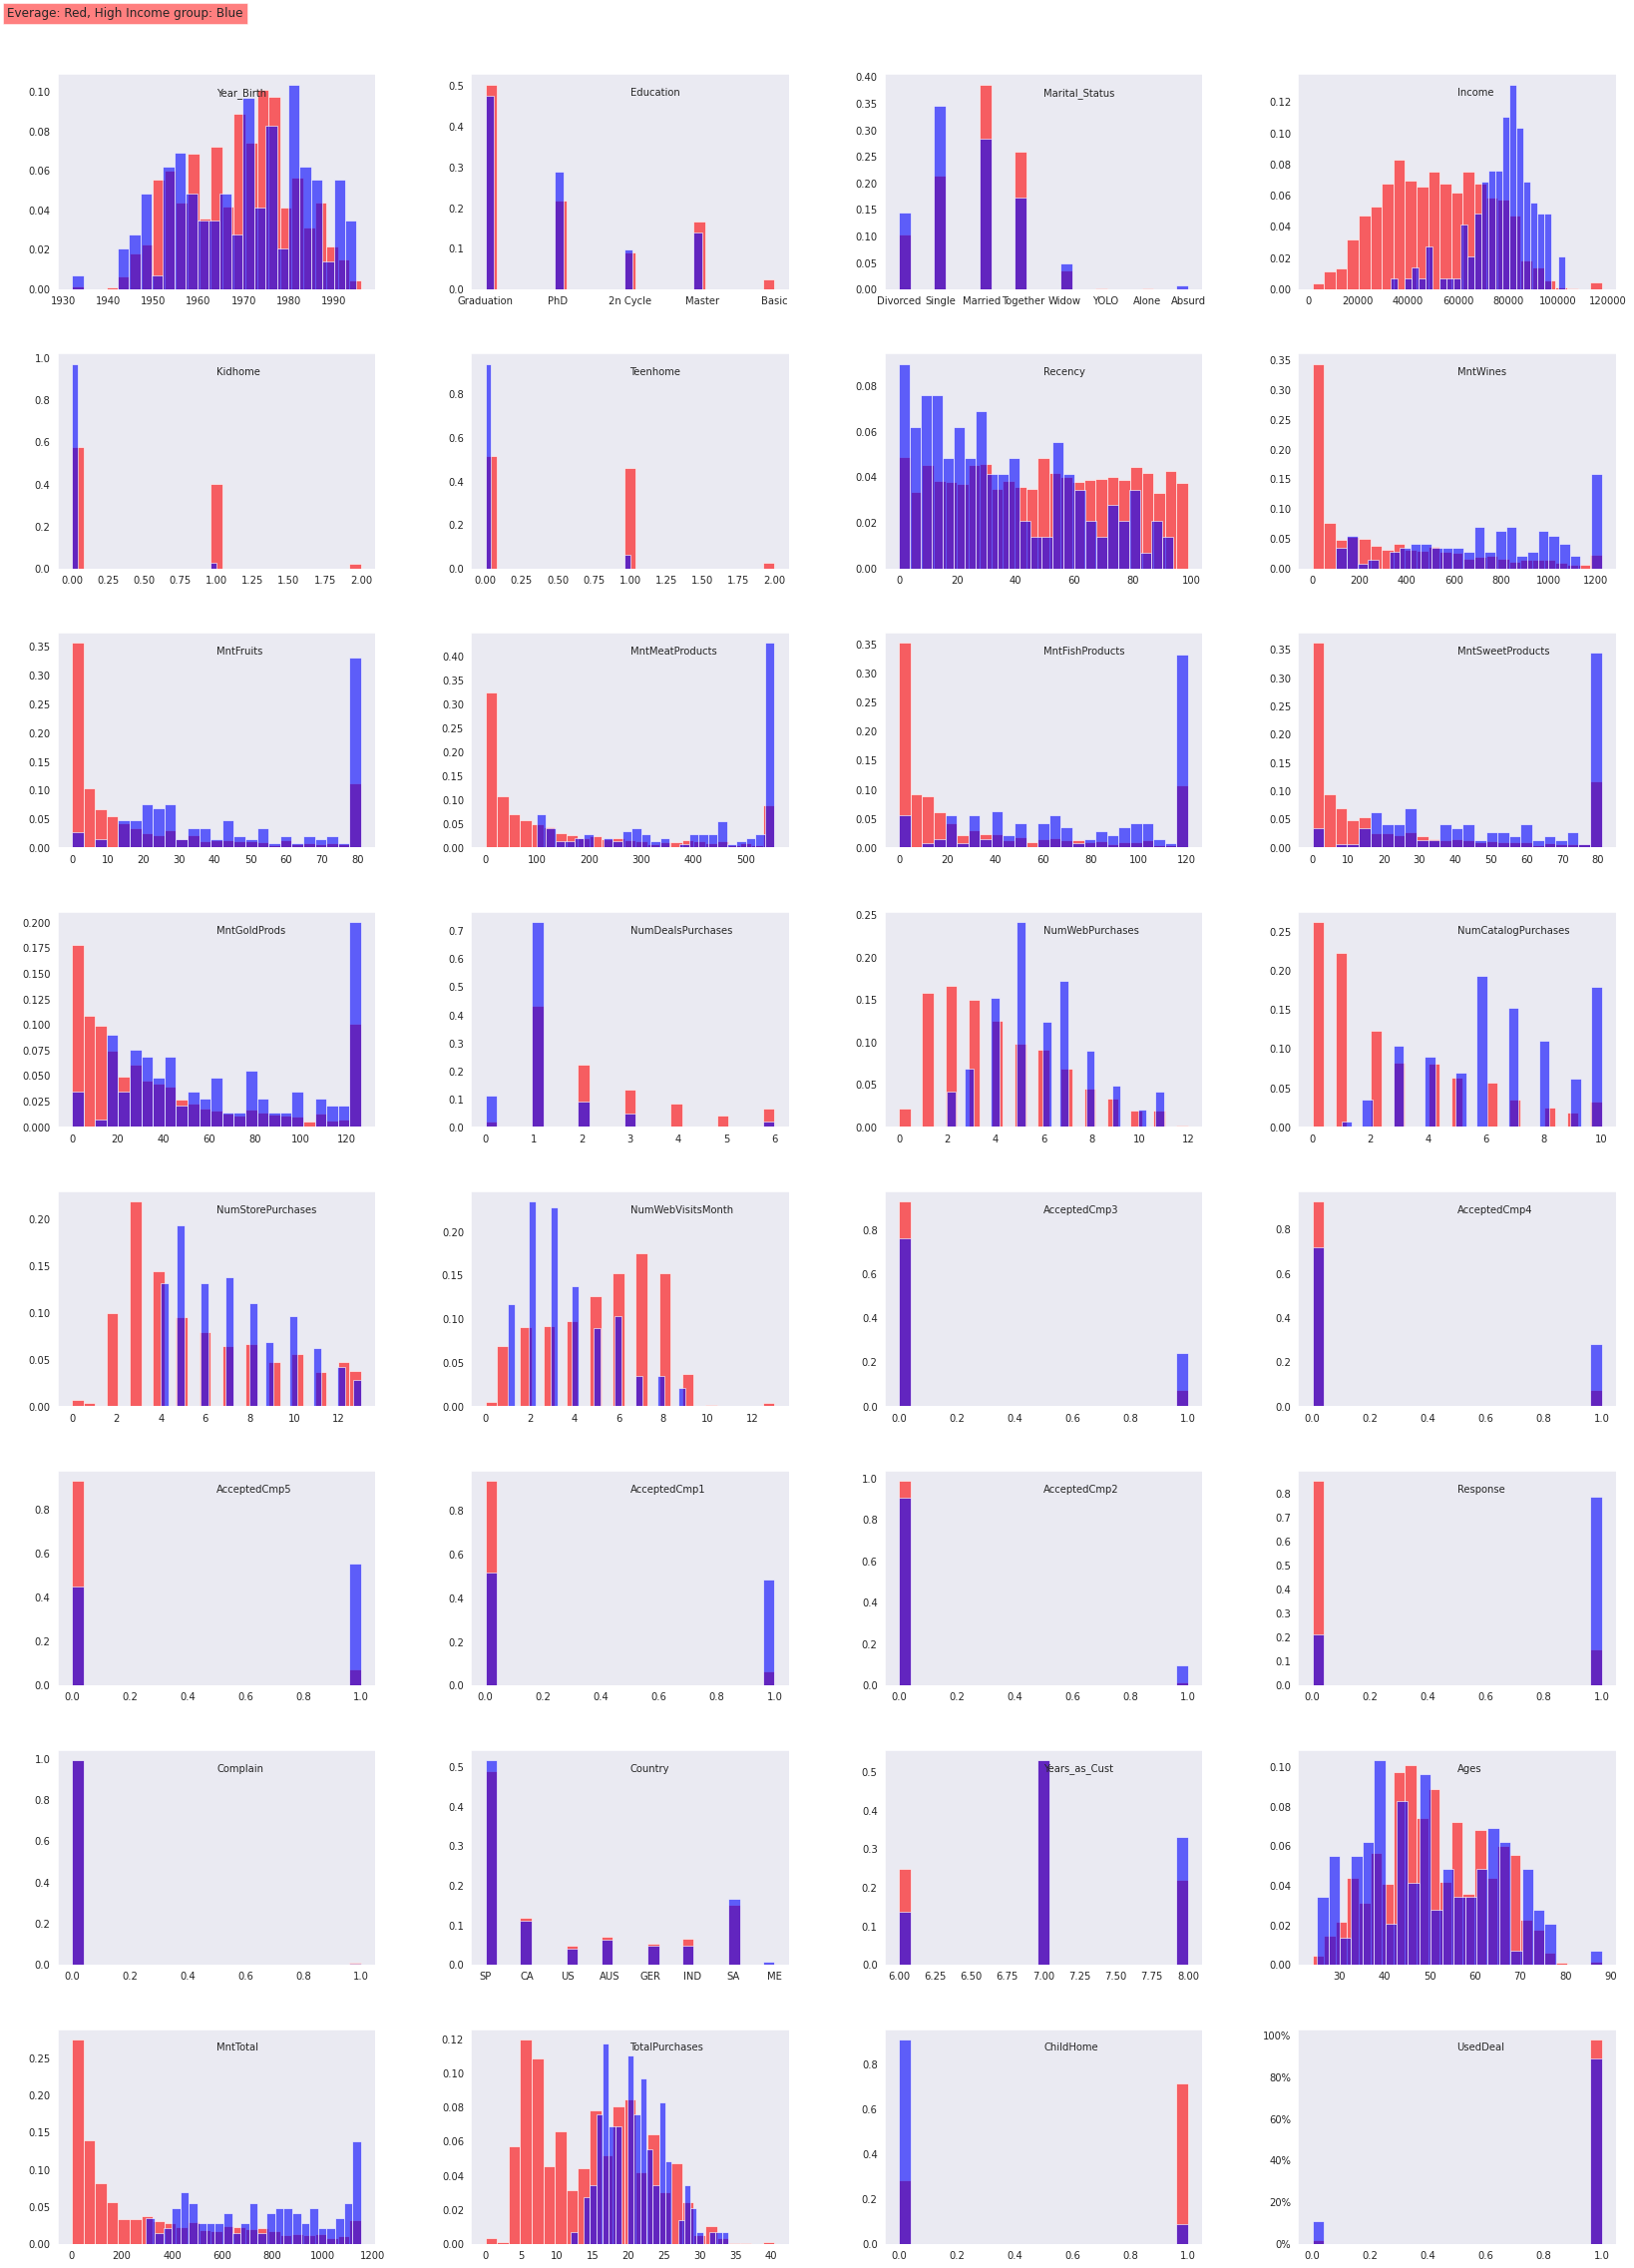

In [102]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_H.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), alpha=0.6, bins=25, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'blue',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), alpha=0.6, bins=25, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, High Income group: Blue',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

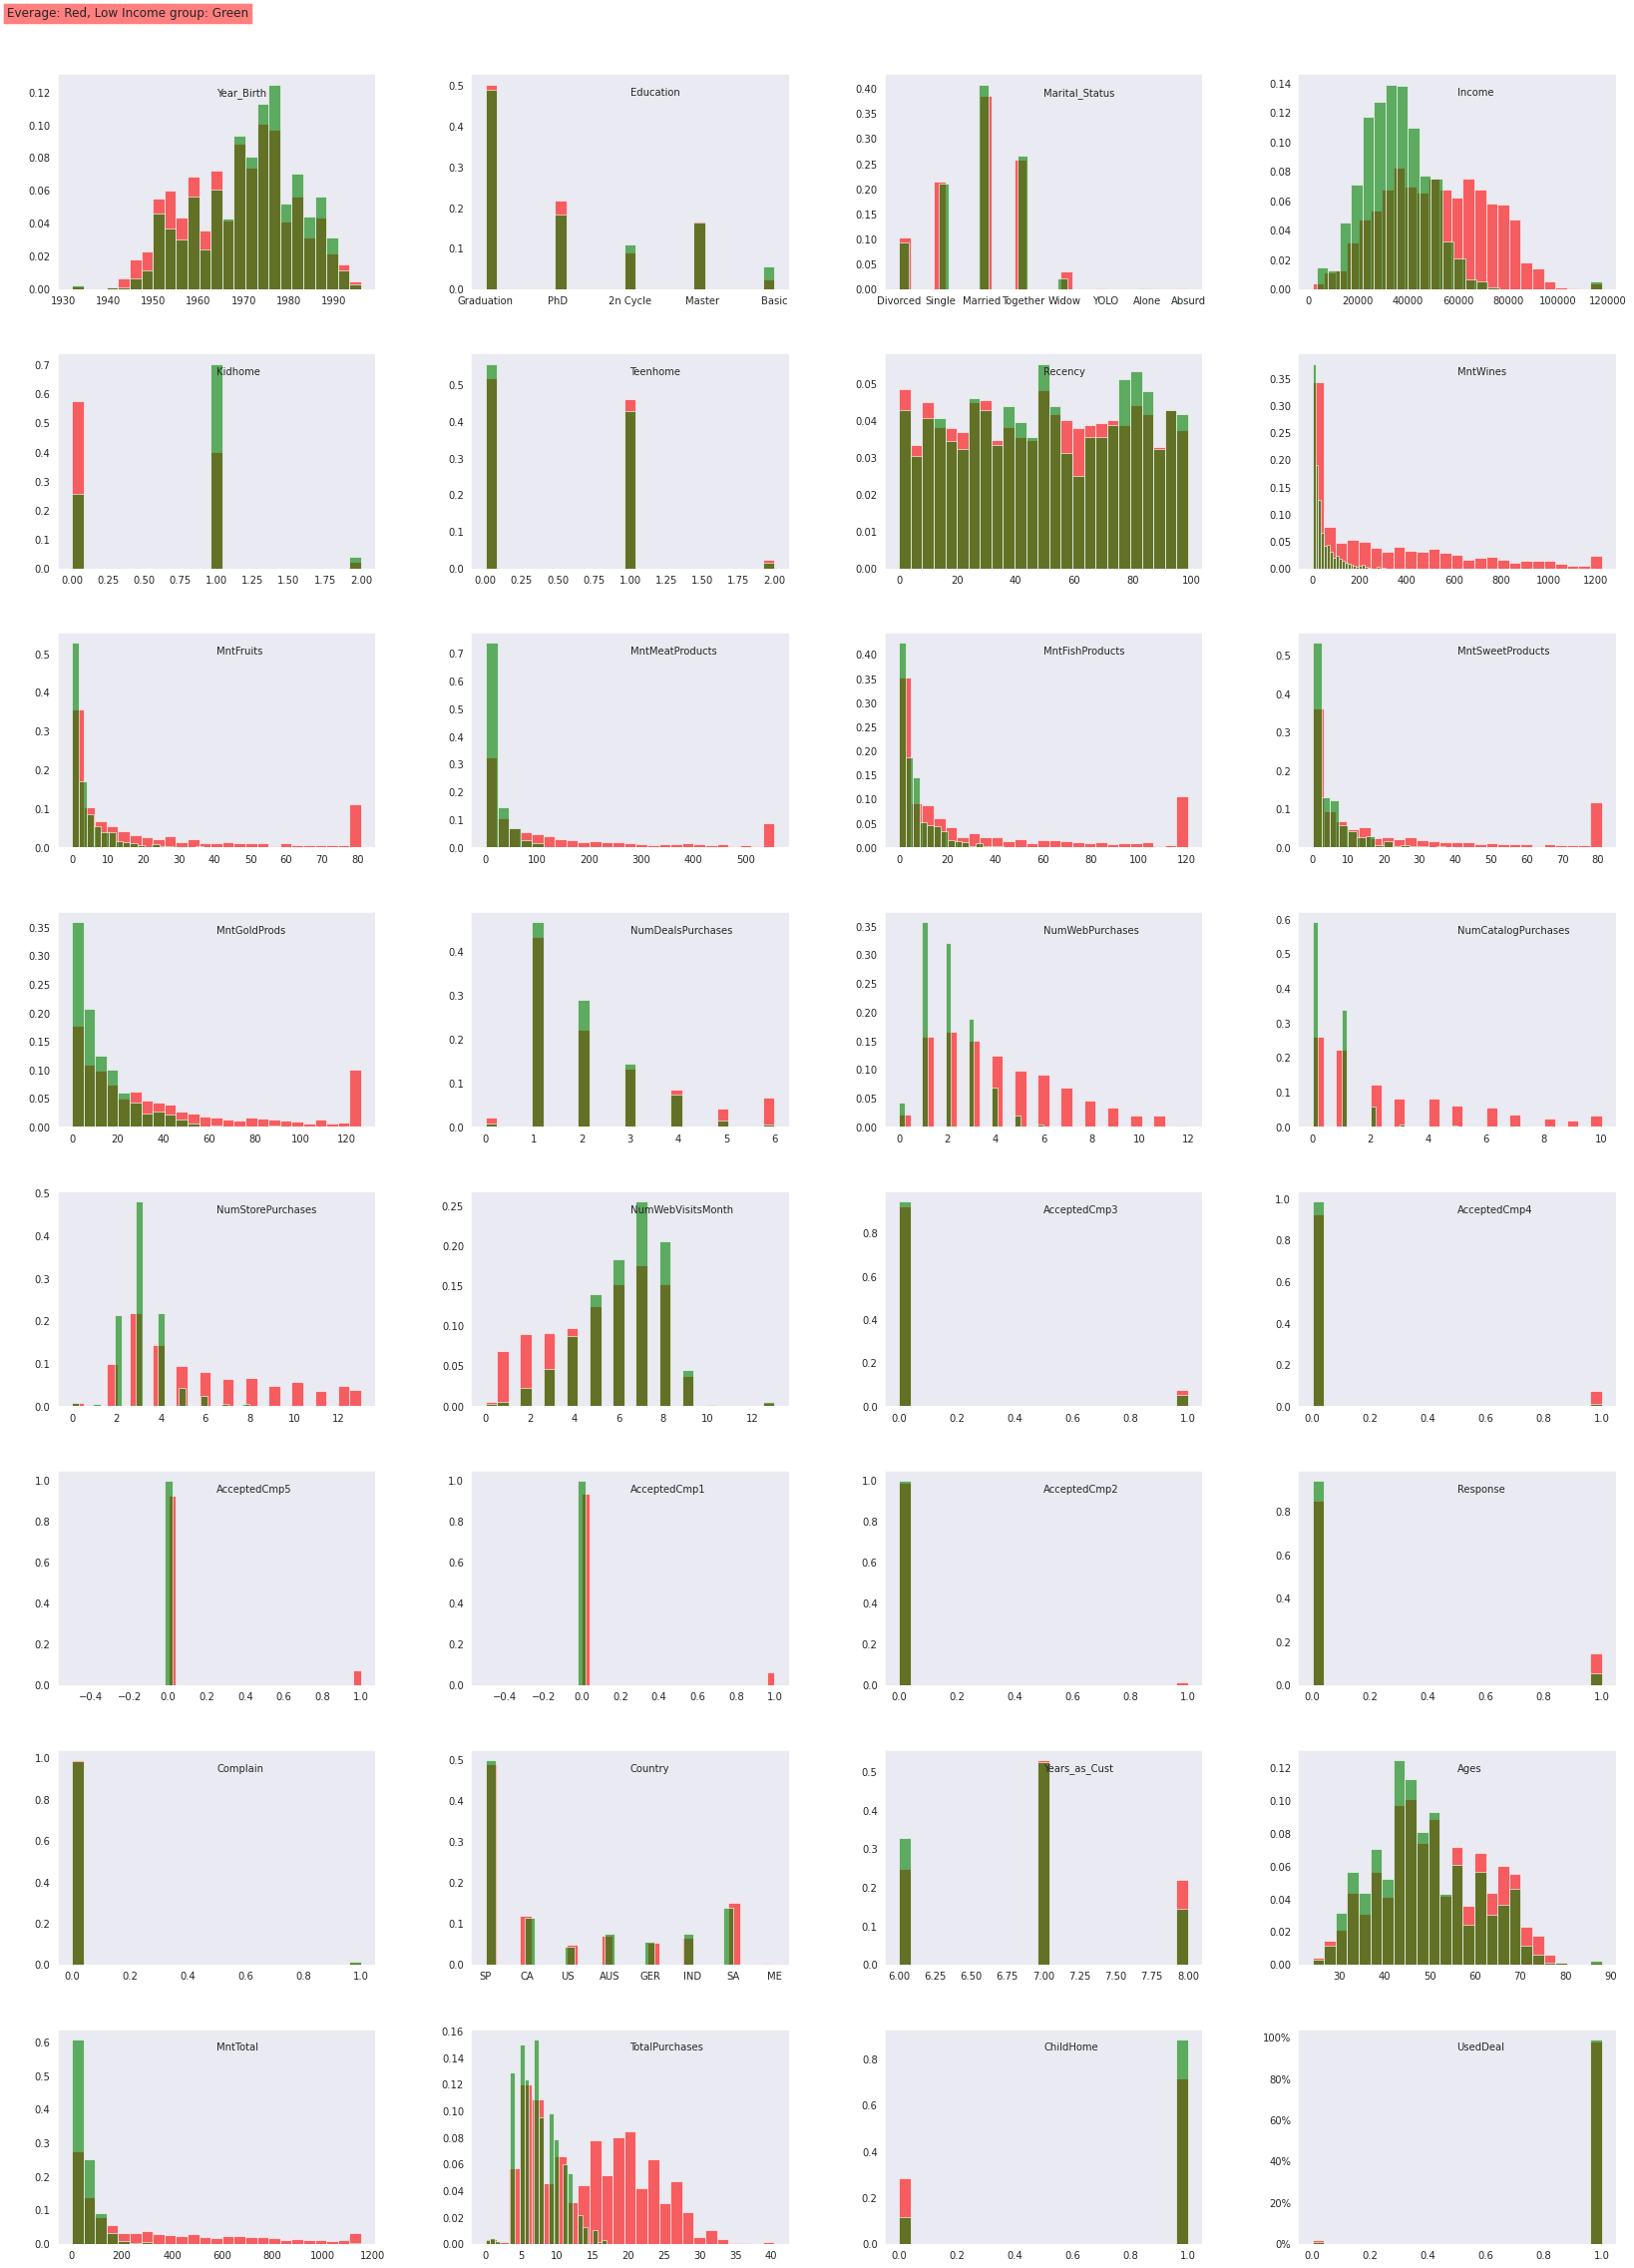

In [103]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_L.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), bins=25, alpha=0.6, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'green',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), bins=25, alpha=0.6, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, Low Income group: Green',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

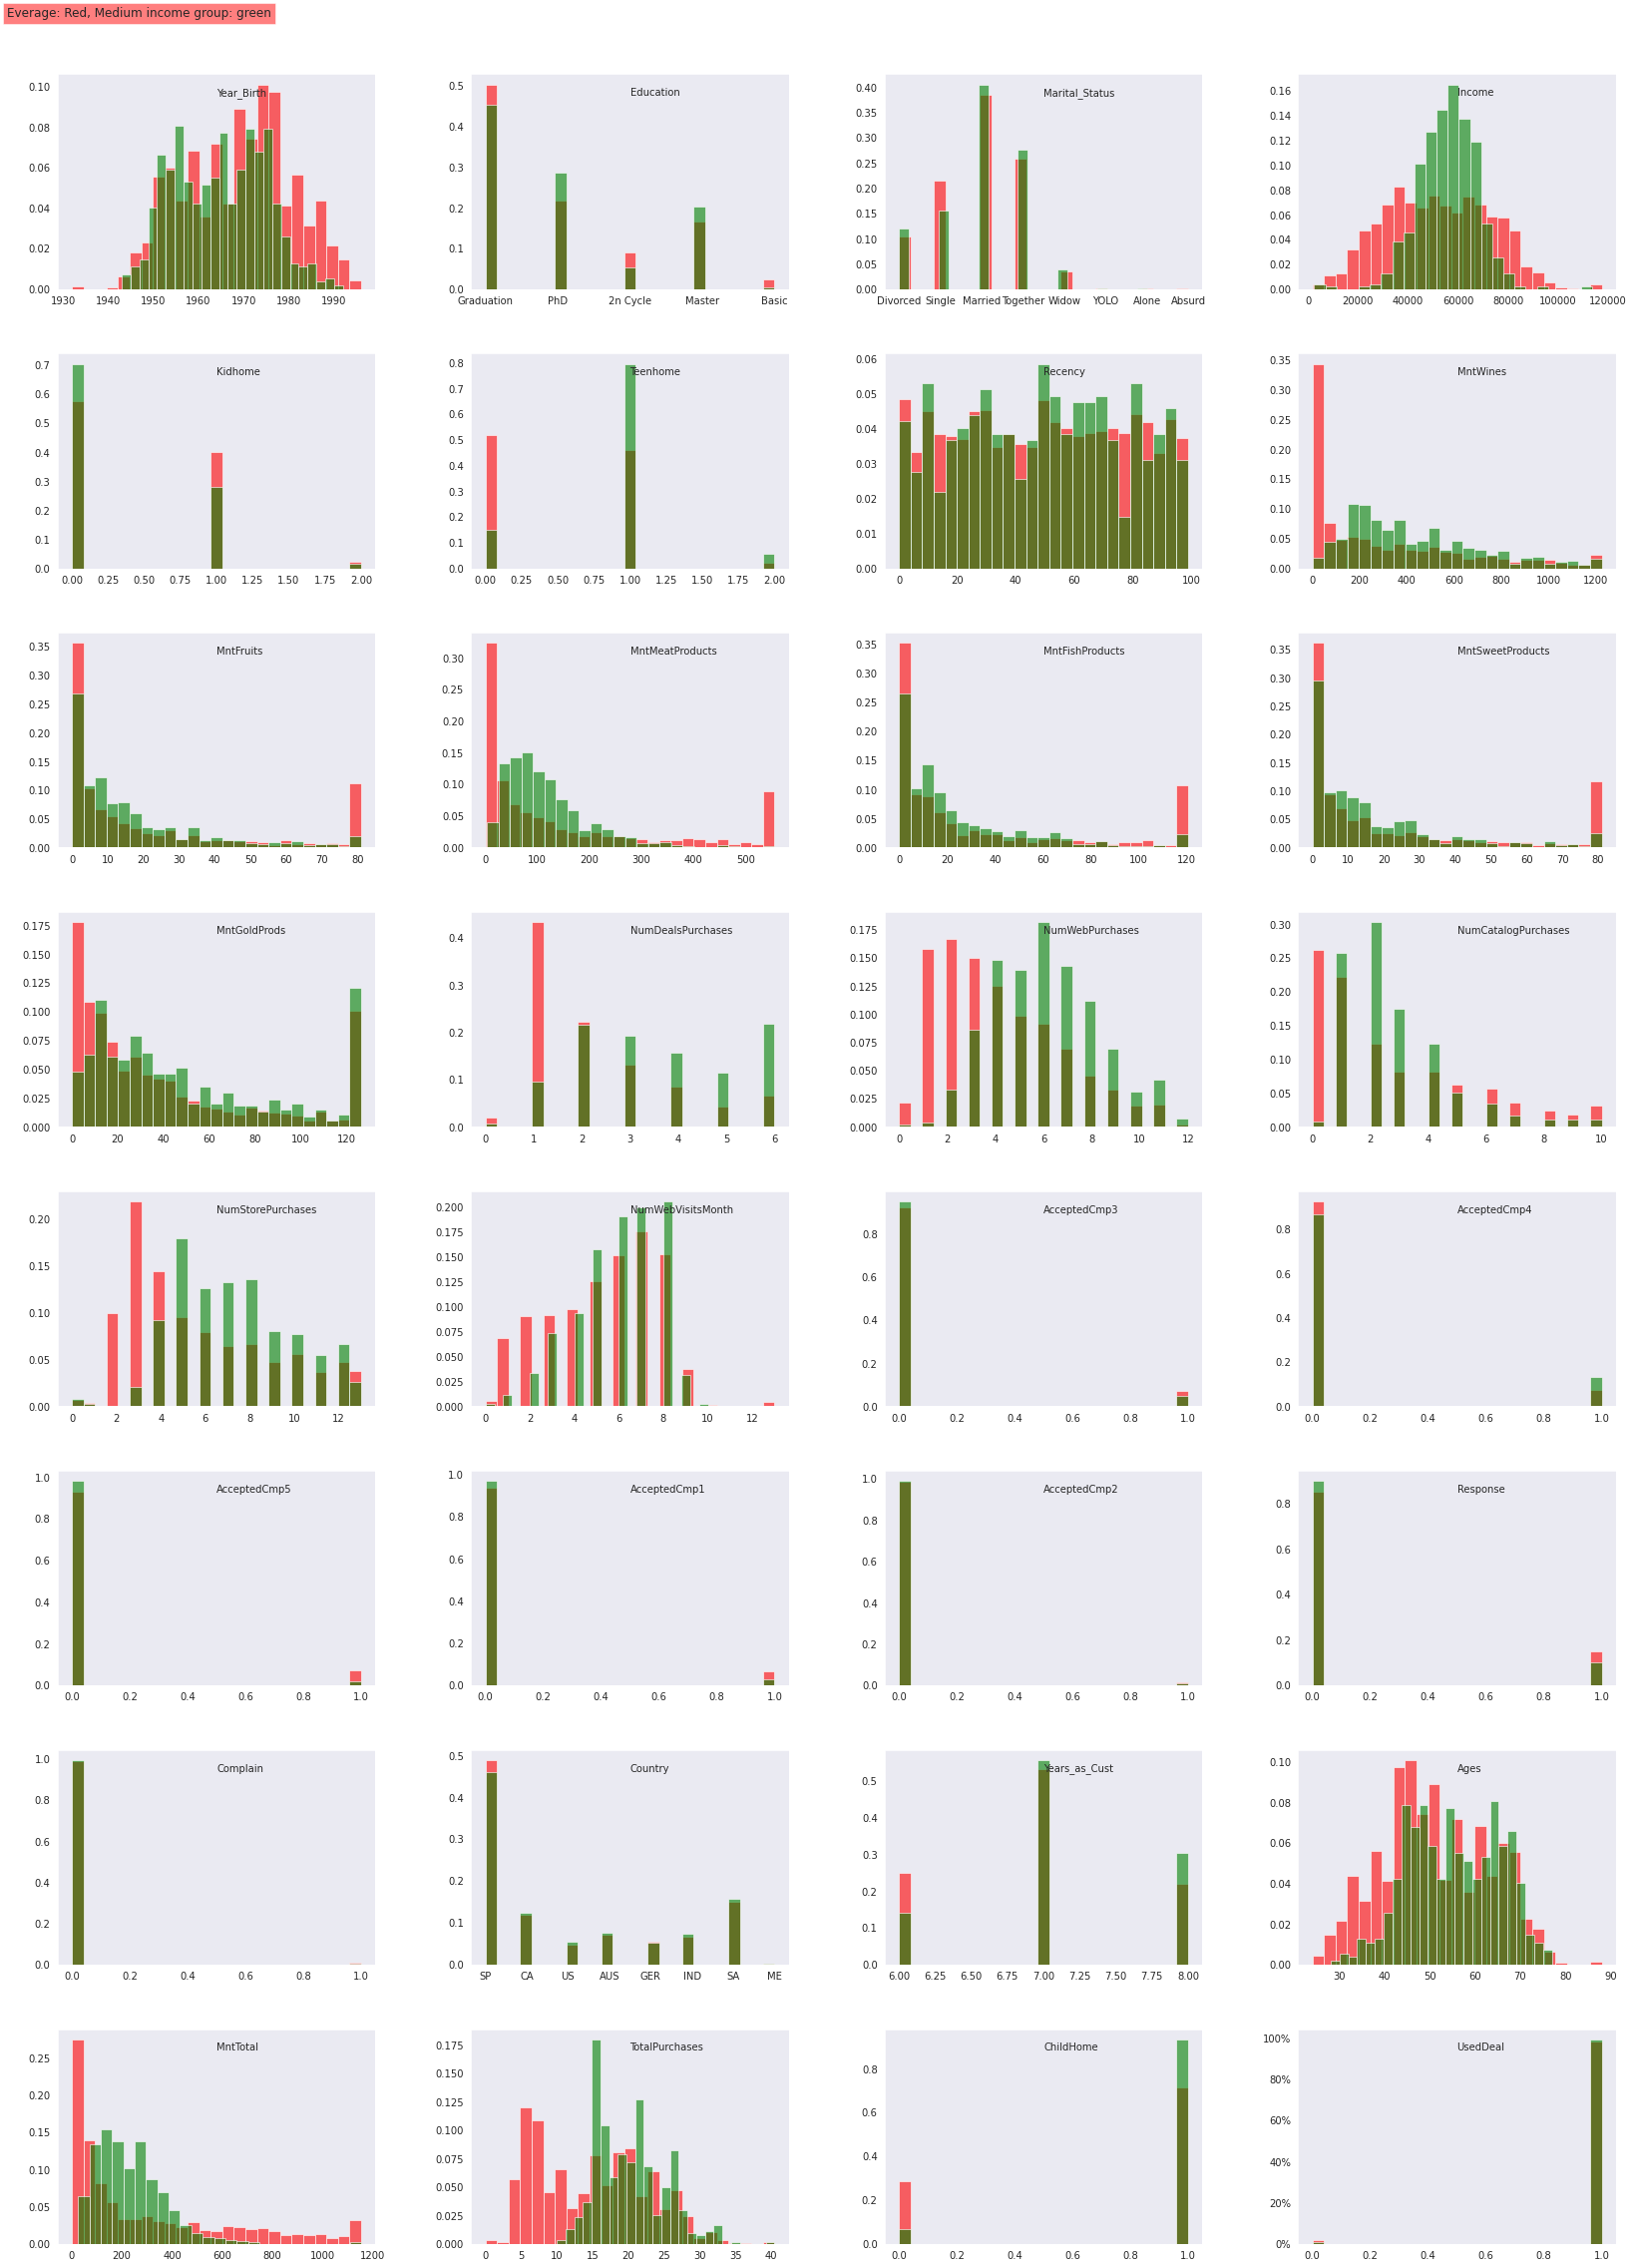

In [104]:
plt_a = mktdata.drop(['ID', 'Dt_Customer'], axis=1)
plt_b = mktdata_M.drop(['ID', 'Dt_Customer'], axis=1)


from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(8,4, figsize=(28, 40))
fig.subplots_adjust(hspace = .3, wspace=.3)

count = 0

for count, item in enumerate(axs.reshape(-1)):
  item.hist(plt_a.iloc[:,count], color = 'red',weights=np.ones(len(plt_a.iloc[:,count])) / len(plt_a.iloc[:,count]), bins=25, alpha=0.6, label=plt_a.columns[count])
  item.hist(plt_b.iloc[:,count], color = 'green',weights=np.ones(len(plt_b.iloc[:,count])) / len(plt_b.iloc[:,count]), bins=25, alpha=0.6, label=plt_b.columns[count])
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  #Title 
  item.text(0.5,0.9,plt_a.columns[count],transform=item.transAxes)

fig.text(0.1,0.9, 'Everage: Red, Medium income group: green',fontsize=12, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

Analytic questions to be answered:

1.	Are there any separated segments in customers' geography, number of purchased products and channels of purchases? How would each segment contribute to the success of the next campaign?
**==> Yes, we can segment our customers by income, amount of product purchased and the household with children or not. There are 3 groups: Hight income + loyal + have no children , middle income with medium amount of purchases + with children, and low income with low amount of purhases + with children.**
2.	Is there a significant relationship between geographical profile or purchase behaviour and the success of the next campaign? Can we predict the success rate?
**==> Yes we can by apply the Gradient Boosting Classifier model and predict the acceptance rate of the next campaign for each customer and also each group. The H&H group have the highest rate of response toward the next campaign while the M&M and L&L are not likely to repsonse. H&H group tend to buy more grocery stuff from us such as meat, fruits, fish but they do not purchase much gold from us and they have the lowest rate of using deal in their purchases **





# ROC curves plotting.  

In [105]:
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [106]:
false_positive_rate_lored, true_positive_rate_lored, threshold_lored = roc_curve(y_test, y_pred_lored)
false_positive_rate_maxtree, true_positive_rate_maxtree, threshold_maxtree = roc_curve(y_test, y_pred_maxtree)
false_positive_rate_optree, true_positive_rate_optree, threshold_optree = roc_curve(y_test, y_pred_optree)
false_positive_rate_GBC, true_positive_rate_GBC, threshold_GBC = roc_curve(y_test, y_pred_GBC)
false_positive_rate_hgb, true_positive_rate_hgb, threshold_hgb = roc_curve(y_test, y_pred_hgb)
false_positive_rate_24logit, true_positive_rate_24logit, threshold_24logit = roc_curve(y_test, y_pred_24logit)


In [107]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred_lored))
print('roc_auc_score for Maximal Tree: ', roc_auc_score(y_test, y_pred_maxtree))
print('roc_auc_score for Optimal Tree: ', roc_auc_score(y_test, y_pred_optree))
print('roc_auc_score for Gradient Boosting Classifer: ', roc_auc_score(y_test, y_pred_GBC))
print('roc_auc_score for Hyperparameter GBC: ', roc_auc_score(y_test, y_pred_hgb))
print('roc_auc_score for Logistic Regression with 24 features: ', roc_auc_score(y_test, y_pred_24logit))




roc_auc_score for Logistic Regression:  0.7019873353929752
roc_auc_score for Maximal Tree:  0.6784986524682838
roc_auc_score for Optimal Tree:  0.6486009772343829
roc_auc_score for Gradient Boosting Classifer:  0.6619557834308376
roc_auc_score for Hyperparameter GBC:  0.6778194088389317
roc_auc_score for Logistic Regression with 24 features:  0.713172944192467


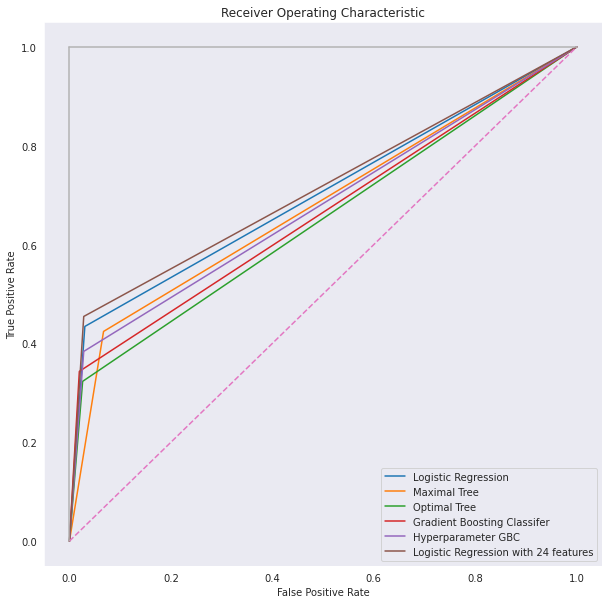

In [108]:
#Plot the curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_lored, true_positive_rate_lored)
plt.plot(false_positive_rate_maxtree, true_positive_rate_maxtree)
plt.plot(false_positive_rate_optree, true_positive_rate_optree)
plt.plot(false_positive_rate_GBC, true_positive_rate_GBC)
plt.plot(false_positive_rate_hgb, true_positive_rate_hgb)
plt.plot(false_positive_rate_24logit, true_positive_rate_24logit)

plt.legend(['Logistic Regression', 'Maximal Tree', 'Optimal Tree', 'Gradient Boosting Classifer', 'Hyperparameter GBC', 'Logistic Regression with 24 features' ])

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
